2020-04-03 update by Malte Venzmer

# Covid-19 predictions

The fit curves are based on the current data, i.e., they only are valid for an unchanged situation. **Update 2020-04-02: Now, the current fit curves are based on data from the last two weeks.**

Data source: 2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE https://github.com/CSSEGISandData/COVID-19



70% limit: One infected person spreads it on average to 3 others. If 2 of 3 (67%) have it already, the number of active cases stays constant.

The median time between onset of symptoms and death is 8-12 days, according to sources cited in Wikipedia. **Update 2020-04-02: In order to replicate the fatality counts more accurately, I reduced the death delay duration from 10 to now 8 days and increased the case fatality rate from 2.3 % to 3.0 %.**


In [1]:
# import packages

import sys
# import time
import datetime as dt
# import math
# import random
import numpy as np
#from numpy import genfromtxt
import pandas as pd
import matplotlib.pyplot as plt
# from matplotlib.pyplot import figure
# import seaborn as sns
# import tensorflow as tf

# enlarge jupyter width
# https://stackoverflow.com/questions/21971449/how-do-i-increase-the-cell-width
#-of-the-jupyter-ipython-notebook-in-my-browser
from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 80% !important; }</style>"))
#        1         2         3         4         5         6         7        7
#234567890123456789012345678901234567890123456789012345678901234567890123456789

#%matplotlib notebook

# The version of the Jupyter notebook server is: 6.0.2
# Current Kernel Information: IPython 7.11.1
# Python version: 3.7.6 (tags/v3.7.6:43364a7ae0, Dec 18 2019, 23:46:00) [MSC v.1916 32 bit (Intel)]
# Pandas version: 0.25.3
# Numpy version: 1.18.0
print("Python version: " + sys.version)
print("Pandas version: " + pd.__version__)
print("Numpy version: " + np.version.version)


Python version: 3.6.4 (v3.6.4:d48eceb, Dec 19 2017, 06:54:40) [MSC v.1900 64 bit (AMD64)]
Pandas version: 0.24.2
Numpy version: 1.17.2


In [2]:
# data reading

def read_to_df(filename):
    # read table, add calculated columns
    #
    # return resulting table as dataframe
    #
    
    filename_transposed = filename[:-4] + "_T.csv"
    pd.read_csv(filename, index_col=0, header=None).T.to_csv(filename_transposed)

    # read table
    index_column = "Country/Region"
    dateparser = lambda x: pd.datetime.strptime(x, '%m/%d/%y')
    data_df = pd.read_csv(filename_transposed, sep=",", decimal='.', skipinitialspace=True, skiprows=[0,2,3], header=0, parse_dates=True, index_col=index_column)
    del data_df['1']

    # add new columns
    col = data_df.pop("US")
    data_df.insert(0, col.name, col)

    cases_per_day = data_df['Germany'].diff(periods=1)
    data_df.insert(0, 'Germany daily cases', cases_per_day)

    col = data_df.pop("Germany")
    data_df.insert(0, col.name, col)
    
    data_df.insert(0, 'World', data_df.sum(axis=1))
    
    import re
    regex = re.compile('China.*')
    matches = [string for string in data_df.columns if re.fullmatch(regex, string)]
    #print(matches)
    #print(data_df[matches].sum(axis=1))
    data_df.insert(1, 'China total', data_df[matches].sum(axis=1))
    
    data_df.insert(1, 'World less China', data_df['World'] - data_df['China total'])
    
    data_df.insert(0, "#", data_df.reset_index().index)
    
    return data_df


# set variables
datafile_confirmed = "time_series_covid19_confirmed_global.csv"
datafile_deaths = "time_series_covid19_deaths_global.csv"
datafile_recovered = "time_series_covid19_recovered_global.csv"
datafiles = [datafile_confirmed, datafile_deaths, datafile_recovered]

dataframes = []
# get current data tables from CSSE JHU
import os
import shutil
import wget
CSSE_github_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'
for datafile in datafiles:
    in_path = CSSE_github_url + datafile
    out_path = "data/" + datafile
    # Overwrite file if already exists
    if os.path.exists(out_path):
        shutil.move(out_path, out_path + ".bak")
    wget.download(CSSE_github_url + datafile, out_path)
    dataframes.append(read_to_df(out_path))
    
data_df, data_deaths_df, data_recovered_df = dataframes


# plot table
data_styler = data_df.head().style#.set_precision(2)
display(HTML(data_styler.render()))
# plot table
data_styler = data_df.tail().style#.set_precision(2)
display(HTML(data_styler.render()))



100% [..........................................................] 47806 / 47806

,#,World,World less China,China total,Germany,Germany daily cases,US,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Australia.1,Australia.2,Australia.3,Australia.4,Australia.5,Australia.6,Australia.7,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Brazil,Brunei,Bulgaria,Burkina Faso,Cabo Verde,Cambodia,Cameroon,Canada,Canada.1,Canada.2,Canada.3,Canada.4,Canada.5,Canada.6,Canada.7,Canada.8,Canada.9,Canada.10,Central African Republic,Chad,Chile,China,China.1,China.2,China.3,China.4,China.5,China.6,China.7,China.8,China.9,China.10,China.11,China.12,China.13,China.14,China.15,China.16,China.17,China.18,China.19,China.20,China.21,China.22,China.23,China.24,China.25,China.26,China.27,China.28,China.29,China.30,China.31,China.32,Colombia,Congo (Brazzaville),Congo (Kinshasa),Costa Rica,Cote d'Ivoire,Croatia,Diamond Princess,Cuba,Cyprus,Czechia,Denmark,Denmark.1,Denmark.2,Djibouti,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Eswatini,Ethiopia,Fiji,Finland,France,France.1,France.2,France.3,France.4,France.5,France.6,France.7,France.8,France.9,Gabon,Gambia,Georgia,Ghana,Greece,Guatemala,Guinea,Guyana,Haiti,Holy See,Honduras,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,"Korea, South",Kuwait,Kyrgyzstan,Latvia,Lebanon,Liberia,Liechtenstein,Lithuania,Luxembourg,Madagascar,Malaysia,Maldives,Malta,Mauritania,Mauritius,Mexico,Moldova,Monaco,Mongolia,Montenegro,Morocco,Namibia,Nepal,Netherlands,Netherlands.1,Netherlands.2,Netherlands.3,New Zealand,Nicaragua,Niger,Nigeria,North Macedonia,Norway,Oman,Pakistan,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Romania,Russia,Rwanda,Saint Lucia,Saint Vincent and the Grenadines,San Marino,Saudi Arabia,Senegal,Serbia,Seychelles,Singapore,Slovakia,Slovenia,Somalia,South Africa,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Taiwan*,Tanzania,Thailand,Togo,Trinidad and Tobago,Tunisia,Turkey,Uganda,Ukraine,United Arab Emirates,United Kingdom,United Kingdom.1,United Kingdom.2,United Kingdom.3,United Kingdom.4,United Kingdom.5,United Kingdom.6,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe,Canada.11,Dominica,Grenada,Mozambique,Syria,Timor-Leste,Belize,Canada.12,Laos,Libya,West Bank and Gaza,Guinea-Bissau,Mali,Saint Kitts and Nevis,Canada.13,Canada.14,Kosovo,Burma,United Kingdom.7,United Kingdom.8,United Kingdom.9,MS Zaandam,Botswana,Burundi,Sierra Leone,Netherlands.4,Malawi
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-22 00:00:00,0,555,7,548,0,nan,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,14,6,1,0,26,2,1,4,1,0,5,0,444,4,0,1,2,0,2,1,1,0,0,2,9,1,5,4,0,0,1,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-23 00:00:00,1,654,11,643,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,22,9,5,2,32,5,3,5,1,2,5,2,444,9,0,5,7,1,3,2,1,0,3,6,16,1,8,4,0,2,2,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-24 00:00:00,2,941,21,920,0,0,2,0,0,

,#,World,World less China,China total,Germany,Germany daily cases,US,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Australia.1,Australia.2,Australia.3,Australia.4,Australia.5,Australia.6,Australia.7,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Brazil,Brunei,Bulgaria,Burkina Faso,Cabo Verde,Cambodia,Cameroon,Canada,Canada.1,Canada.2,Canada.3,Canada.4,Canada.5,Canada.6,Canada.7,Canada.8,Canada.9,Canada.10,Central African Republic,Chad,Chile,China,China.1,China.2,China.3,China.4,China.5,China.6,China.7,China.8,China.9,China.10,China.11,China.12,China.13,China.14,China.15,China.16,China.17,China.18,China.19,China.20,China.21,China.22,China.23,China.24,China.25,China.26,China.27,China.28,China.29,China.30,China.31,China.32,Colombia,Congo (Brazzaville),Congo (Kinshasa),Costa Rica,Cote d'Ivoire,Croatia,Diamond Princess,Cuba,Cyprus,Czechia,Denmark,Denmark.1,Denmark.2,Djibouti,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Eswatini,Ethiopia,Fiji,Finland,France,France.1,France.2,France.3,France.4,France.5,France.6,France.7,France.8,France.9,Gabon,Gambia,Georgia,Ghana,Greece,Guatemala,Guinea,Guyana,Haiti,Holy See,Honduras,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,"Korea, South",Kuwait,Kyrgyzstan,Latvia,Lebanon,Liberia,Liechtenstein,Lithuania,Luxembourg,Madagascar,Malaysia,Maldives,Malta,Mauritania,Mauritius,Mexico,Moldova,Monaco,Mongolia,Montenegro,Morocco,Namibia,Nepal,Netherlands,Netherlands.1,Netherlands.2,Netherlands.3,New Zealand,Nicaragua,Niger,Nigeria,North Macedonia,Norway,Oman,Pakistan,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Romania,Russia,Rwanda,Saint Lucia,Saint Vincent and the Grenadines,San Marino,Saudi Arabia,Senegal,Serbia,Seychelles,Singapore,Slovakia,Slovenia,Somalia,South Africa,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Taiwan*,Tanzania,Thailand,Togo,Trinidad and Tobago,Tunisia,Turkey,Uganda,Ukraine,United Arab Emirates,United Kingdom,United Kingdom.1,United Kingdom.2,United Kingdom.3,United Kingdom.4,United Kingdom.5,United Kingdom.6,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe,Canada.11,Dominica,Grenada,Mozambique,Syria,Timor-Leste,Belize,Canada.12,Laos,Libya,West Bank and Gaza,Guinea-Bissau,Mali,Saint Kitts and Nevis,Canada.13,Canada.14,Kosovo,Burma,United Kingdom.7,United Kingdom.8,United Kingdom.9,MS Zaandam,Botswana,Burundi,Sierra Leone,Netherlands.4,Malawi
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-29 00:00:00,67,724517,642395,82122,62095,4400,140886,120,212,511,334,7,7,745,424,77,1791,15,656,299,66,769,311,8788,209,11,499,48,33,94,10836,6,4,81,323,4256,126,346,222,6,103,139,621,884,13,72,66,135,122,1355,11,2840,156,3,3,2139,990,577,579,338,138,1475,254,146,168,319,484,1276,641,67801,1018,95,644,937,98,134,37,75,18,253,772,492,136,550,166,1,76,180,1254,702,19,65,314,165,713,712,139,214,2817,159,10,2395,18,859,1924,609,24,12,12,679,9,21,5,1240,28,30,106,63,15,183,5,11,93,40174,7,4,91,152,1156,34,16,8,15,6,110,408,1020,1024,1285,38309,547,2615,4247,97689,32,1866,259,284,42,9583,255,84,347,438,3,56,460,1950,39,2470,17,151,5,107,848,263,46,12,85,479,11,5,50,8,6,10866,514,4,18,111,259,4284,167,1597,901,1,59,852,1418,1862,5962,634,1815,1534,70,9,1,224,1299,142,741,8,844,314,730,3,1280,80110,117,6,8,3700,14829,298,14,1388,25,78,312,9217,33,475,570,22,8,108,65,42,5,19522,304,144,119,188,29,7,0,11,9,8,9,1,2,0,8,8,109,2,18,2,1,4,94,10,2,2,4,2,0,0,0,0,0
2020-03-30 00:00:00,68,787155,704957,82198,66885,4790,161807,170,223,584,370,7,7,820,482,78,2032,15,689,305,66,821,355,9618,273,14,515,49,33,152,11899,6,4,97,368,4579,127,359,246,6,107,1

c:\python36\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


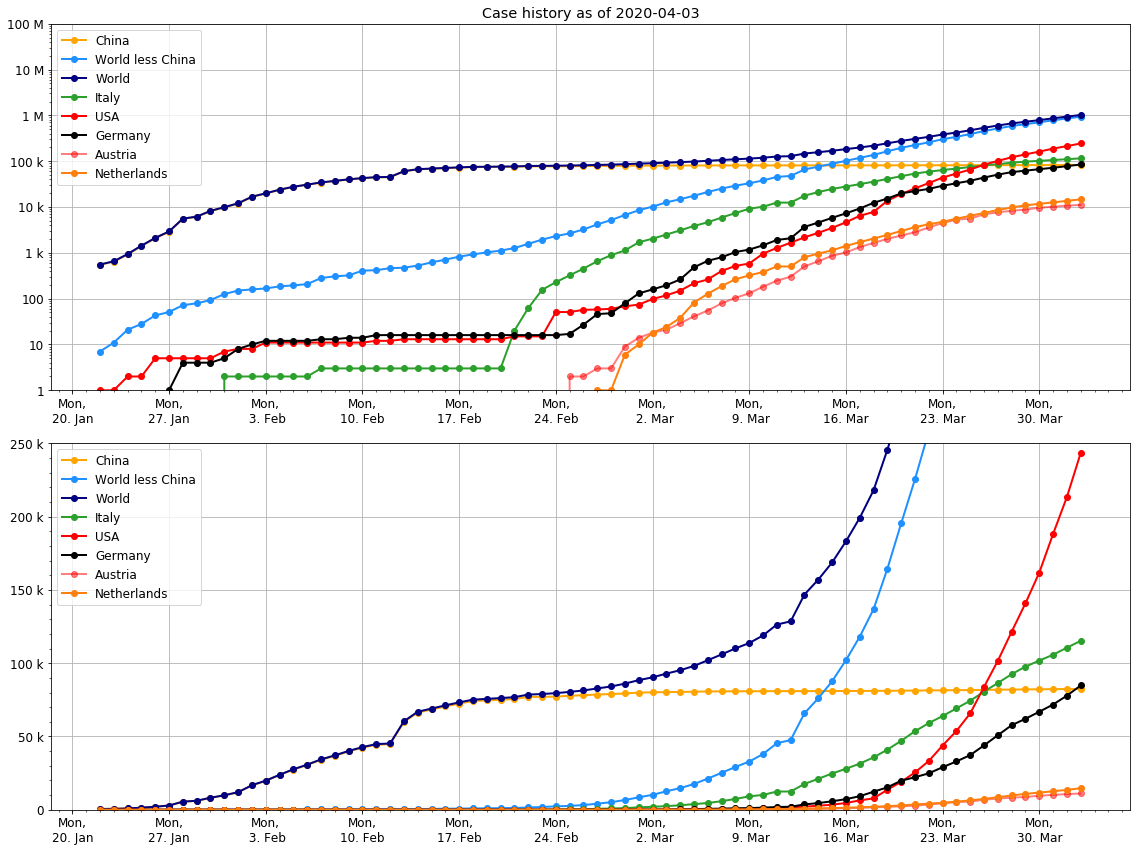

In [3]:
# plot time series

from matplotlib.ticker import (EngFormatter, FuncFormatter, FormatStrFormatter, AutoMinorLocator, NullFormatter)
import matplotlib.dates as mdates

months = mdates.MonthLocator()  # every month
weeks = mdates.WeekdayLocator(byweekday=0)  # every week
days = mdates.DayLocator()  # every day

today = str(dt.datetime.now().date())
#print(today)

xmin = "2020-01-22"
xmax = "2020-05-01"

x =  np.linspace(0, 100, 10000)

####--  Line styles  --####
# linestyle (ls): '-', '--', '-.', ':'
# linewidth (lw)
lc1 = {'color': "white"}
lc2 = {'color': "red"}
lc3 = {'color': "tab:green"}
lc4 = {'color': "dodgerblue"}
lc5 = {'color': "orange"}
lc6 = {'color': "saddlebrown"}
lc7 = {'color': "lightskyblue"}
lc8 = {'color': "navy"}
lc9 = {'color': "darkmagenta"}
lc10 = {'color': "black"}
lc11 = {'color': "silver"}
lc12 = {'color': "grey"}

lc25 = {'color': "tab:orange"}

lc110 = {'linestyle': '--', 'linewidth': 2, 'color': "y"}

font = {'family': 'sans-serif', 'weight': 'normal', 'size': '12'}
plt.rc('font', **font)  # pass in the font dict as kwargs
#plt.rc('axes', titlesize=10, labelsize=10)
#plt.rc('xtick', labelsize=10)
#plt.rc('ytick', labelsize=10)
plt.rc('lines', lw=2, ls='-')

# define subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 12))


# set subplot
ax = axes[0]
ax.plot(data_df['China total'], 'o-', label='China', **lc5)
ax.plot(data_df['World less China'], 'o-', label='World less China', **lc4)
ax.plot(data_df['World'], 'o-', label='World', **lc8)
ax.plot(data_df['Italy'], 'o-', label='Italy', **lc3)
ax.plot(data_df['US'], 'o-', label='USA', **lc2)
ax.plot(data_df['Germany'], 'o-', label='Germany', **lc10)
ax.plot(data_df['Austria'], 'o-', label='Austria', **lc2, alpha=0.5)
ax.plot(data_df['Netherlands.3'], 'o-', label='Netherlands', **lc25)


#ax.set_xlim(0, 5)
ax.set_ylim(1, 1e8)

#ax.set_xlabel("x")
#ax.set_ylabel("y")
#ax.set_title("My")
ax.set_title("Case history as of "+today)

#ax.set_xscale('log')
ax.set_yscale('log')

# set subplot
ax = axes[1]
ax.plot(data_df['China total'], 'o-', label='China', **lc5)
ax.plot(data_df['World less China'], 'o-', label='World less China', **lc4)
ax.plot(data_df['World'], 'o-', label='World', **lc8)
ax.plot(data_df['Italy'], 'o-', label='Italy', **lc3)
ax.plot(data_df['US'], 'o-', label='USA', **lc2)
ax.plot(data_df['Germany'], 'o-', label='Germany', **lc10)
ax.plot(data_df['Austria'], 'o-', label='Austria', **lc2, alpha=0.5)
ax.plot(data_df['Netherlands.3'], 'o-', label='Netherlands', **lc25)

#ax.set_xlim(xmin, xmax)
ax.set_ylim(0, 2.5e5)

#ax.set_xlabel("x")
#ax.set_ylabel("y")
#ax.set_title("My")

#ax.set_xscale('log')
#ax.set_yscale('log')

# general settings
for ax in axes:
    ax.minorticks_on()
    ax.xaxis.set_major_locator(weeks)
    ax.xaxis.set_minor_locator(days)
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%a,\n%e. %b"))
    ax.yaxis.set_major_formatter(EngFormatter(unit=''))
    ax.legend(loc='upper left') # fontsize='small'
    ax.grid(True)

# show and save
plt.tight_layout()
plt.show()
fig.savefig("plots/plot_covid19_timeseries_history.png")



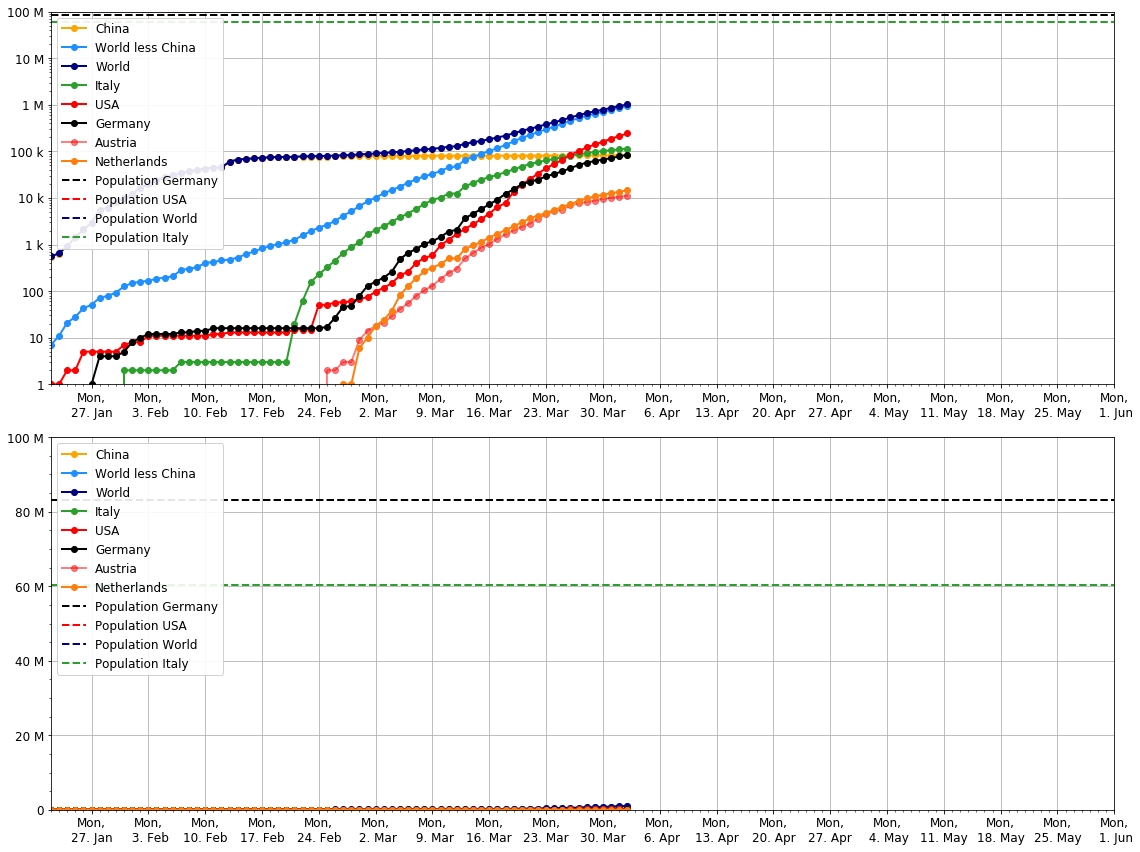

In [4]:
# plot time series
import matplotlib.dates as mdates
months = mdates.MonthLocator()  # every month
weeks = mdates.WeekdayLocator(byweekday=0)  # every week
days = mdates.DayLocator()  # every day

#data_df['World']
#data_df['China']
#data_df['Germany']
#data_df['USA']

xmin = "2020-01-22"
xmax = "2020-06-01"
ymax = 1e8
population_it = 60317546
population_de = 83149300
population_us = 328239523
population_world = 7.7e9


####--  Line styles  --####
# linestyle (ls): '-', '--', '-.', ':'
# linewidth (lw)
lc1 = {'color': "white"}
lc2 = {'color': "red"}
lc3 = {'color': "tab:green"}
lc4 = {'color': "dodgerblue"}
lc5 = {'color': "orange"}
lc6 = {'color': "saddlebrown"}
lc7 = {'color': "lightskyblue"}
lc8 = {'color': "navy"}
lc9 = {'color': "darkmagenta"}
lc10 = {'color': "black"}
lc11 = {'color': "silver"}
lc12 = {'color': "grey"}

lc110 = {'linestyle': '--', 'linewidth': 2, 'color': "y"}

font = {'family': 'sans-serif', 'weight': 'normal', 'size': '12'}
plt.rc('font', **font)  # pass in the font dict as kwargs
#plt.rc('axes', titlesize=10, labelsize=10)
#plt.rc('xtick', labelsize=10)
#plt.rc('ytick', labelsize=10)
plt.rc('axes', axisbelow=True)
plt.rc('legend', fancybox=True, framealpha=0.9)
plt.rc('lines', lw=2, ls='-')


# define subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 12))


# set subplot
ax = axes[0]
ax.plot(data_df['China total'], 'o-', label='China', **lc5)
ax.plot(data_df['World less China'], 'o-', label='World less China', **lc4)
ax.plot(data_df['World'], 'o-', label='World', **lc8)
ax.plot(data_df['Italy'], 'o-', label='Italy', **lc3)
ax.plot(data_df['US'], 'o-', label='USA', **lc2)
ax.plot(data_df['Germany'], 'o-', label='Germany', **lc10)
ax.plot(data_df['Austria'], 'o-', label='Austria', **lc2, alpha=0.5)
ax.plot(data_df['Netherlands.3'], 'o-', label='Netherlands', **lc25)
#ax.plot(data_df.index, [1e5]*58, '--', label='Germany', **lc10)
ax.hlines(y=population_de, xmin=xmin, xmax=xmax, linestyles='--', **lc10, label="Population Germany")
ax.hlines(y=population_us, xmin=xmin, xmax=xmax, linestyles='--', **lc2, label="Population USA")
ax.hlines(y=population_world, xmin=xmin, xmax=xmax, linestyles='--', **lc8, label="Population World")
ax.hlines(y=population_it, xmin=xmin, xmax=xmax, linestyles='--', **lc3, label="Population Italy")
#ax.plot(data_df.index, [np.exp(x)]*58, '-', label='Prediction', **lc10)

ax.set_xlim(xmin, xmax)
ax.set_ylim(1, ymax)

#ax.set_xlabel("x")
#ax.set_ylabel("y")
#ax.set_title("My")

#ax.set_xscale('log')
ax.set_yscale('log')


# set subplot
ax = axes[1]
ax.plot(data_df['China total'], 'o-', label='China', **lc5)
ax.plot(data_df['World less China'], 'o-', label='World less China', **lc4)
ax.plot(data_df['World'], 'o-', label='World', **lc8)
ax.plot(data_df['Italy'], 'o-', label='Italy', **lc3)
ax.plot(data_df['US'], 'o-', label='USA', **lc2)
ax.plot(data_df['Germany'], 'o-', label='Germany', **lc10)
ax.plot(data_df['Austria'], 'o-', label='Austria', **lc2, alpha=0.5)
ax.plot(data_df['Netherlands.3'], 'o-', label='Netherlands', **lc25)

ax.hlines(y=population_de, xmin=xmin, xmax=xmax, linestyles='--', **lc10, label="Population Germany")
ax.hlines(y=population_us, xmin=xmin, xmax=xmax, linestyles='--', **lc2, label="Population USA")
ax.hlines(y=population_world, xmin=xmin, xmax=xmax, linestyles='--', **lc8, label="Population World")
ax.hlines(y=population_it, xmin=xmin, xmax=xmax, linestyles='--', **lc3, label="Population Italy")
#ax.plot(data_df.index, [np.exp(x)]*58, '-', label='Prediction', **lc10)

ax.set_xlim(xmin, xmax)
ax.set_ylim(0, ymax)

#ax.set_xlabel("x")
#ax.set_ylabel("y")
#ax.set_title("My")


# general settings
for ax in axes:
    ax.minorticks_on()
    ax.xaxis.set_major_locator(weeks)
    ax.xaxis.set_minor_locator(days)
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%a,\n%e. %b"))
    ax.yaxis.set_major_formatter(EngFormatter(unit=''))
    ax.legend(loc='upper left') # fontsize='small'
    ax.grid(True)


# show and save
plt.tight_layout()
plt.show()
fig.savefig("plots/plot_covid19_timeseries_prediction.png")


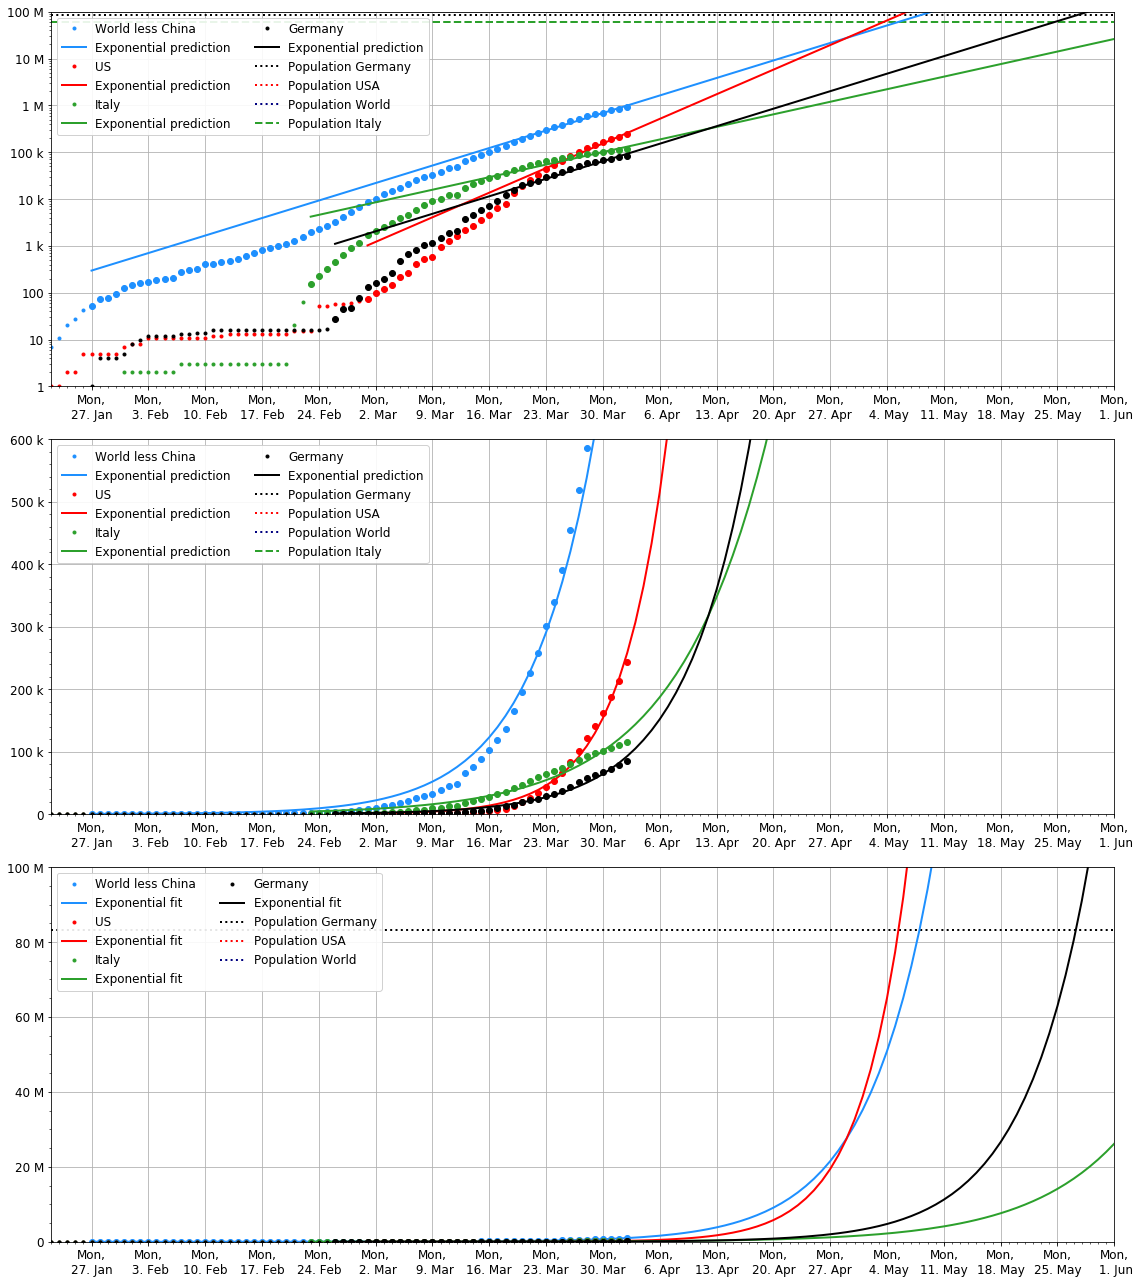

In [5]:
# fit curves
# - exponential
# - logistic
# - numeric: rate of change: good, as-is, max rate observed

def exp_func(x, a, b):
    return a * np.exp(b * x)
                      
def logistic_func(x, a, b):
    return a * np.exp(-x) / (1 + np.exp(-x))**2.0


from scipy.stats import expon, logistic
from scipy import optimize

xmin = "2020-01-22"
xmax = "2020-06-01"


# set prediction xrange
pred_duration = 190
x_pred_duration = np.arange(pred_duration)
x_pred_duration_dates = pd.date_range('2020-01-22', periods=pred_duration, freq='1d')
pred_range_de = slice(pred_duration, None)

# fit exponential function to all regions
regions = ["World less China", "US", "Italy", "Germany"]
regions_lc = [lc4, lc2, lc3, lc10]
regions_fit_ranges = [slice(5, None), slice(39, None), slice(32, None), slice(35, None)]
exp_params = []
for i, region in enumerate(regions):
    x_data = data_df["#"][regions_fit_ranges[i]]
    y_data = data_df[region][regions_fit_ranges[i]]
    exp_params.append(optimize.curve_fit(exp_func, x_data, y_data, p0=[1, 0.05])[0])



##########################
plt.rc('legend', fancybox=True, framealpha=0.9)

# define subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(16, 18))

# set subplot
ax = axes[0]
for i, region in enumerate(regions):
    ax.plot(data_df[region], 'o', ms=3, label=region, **regions_lc[i])
    ax.plot(data_df[region][regions_fit_ranges[i]], 'o', label=region, **regions_lc[i])
    ax.plot(x_pred_duration_dates[regions_fit_ranges[i]], exp_func(x_pred_duration[regions_fit_ranges[i]], exp_params[i][0], exp_params[i][1]), '-', label='Exponential prediction', **regions_lc[i], alpha=1)

ax.hlines(y=population_de, xmin=xmin, xmax=xmax, linestyles=':', **lc10, label="Population Germany")
ax.hlines(y=population_us, xmin=xmin, xmax=xmax, linestyles=':', **lc2, label="Population USA")
ax.hlines(y=population_world, xmin=xmin, xmax=xmax, linestyles=':', **lc8, label="Population World")
ax.hlines(y=population_it, xmin=xmin, xmax=xmax, linestyles='--', **lc3, label="Population Italy")

# settings
ax.set_xlim(xmin, xmax)
ax.set_ylim(1, ymax)

#ax.set_xlabel("x")
#ax.set_ylabel("y")
#ax.set_title("My")

#ax.set_xscale('log')
ax.set_yscale('log')


# set subplot
ax = axes[1]
for i, region in enumerate(regions):
    ax.plot(data_df[region], 'o', ms=3, label=region, **regions_lc[i])
    ax.plot(data_df[region][regions_fit_ranges[i]], 'o', label=region, **regions_lc[i])
    ax.plot(x_pred_duration_dates[regions_fit_ranges[i]], exp_func(x_pred_duration[regions_fit_ranges[i]], exp_params[i][0], exp_params[i][1]), '-', label='Exponential prediction', **regions_lc[i], alpha=1)

ax.hlines(y=population_de, xmin=xmin, xmax=xmax, linestyles=':', **lc10, label="Population Germany")
ax.hlines(y=population_us, xmin=xmin, xmax=xmax, linestyles=':', **lc2, label="Population USA")
ax.hlines(y=population_world, xmin=xmin, xmax=xmax, linestyles=':', **lc8, label="Population World")
ax.hlines(y=population_it, xmin=xmin, xmax=xmax, linestyles='--', **lc3, label="Population Italy")

# settings
ax.set_xlim(xmin, xmax)
ax.set_ylim(1, 6e5)

#ax.set_xlabel("x")
#ax.set_ylabel("y")
#ax.set_title("My")

#ax.set_xscale('log')
#ax.set_yscale('log')



# set subplot
ax = axes[2]
for i, region in enumerate(regions):
    ax.plot(data_df[region], 'o', ms=3, label=region, **regions_lc[i])
    ax.plot(data_df[region][regions_fit_ranges[i]], 'o', label=region, **regions_lc[i])
    ax.plot(x_pred_duration_dates[regions_fit_ranges[i]], exp_func(x_pred_duration[regions_fit_ranges[i]], exp_params[i][0], exp_params[i][1]), '-', label='Exponential fit', **regions_lc[i], alpha=1)

ax.hlines(y=population_de, xmin=xmin, xmax=xmax, linestyles=':', **lc10, label="Population Germany")
ax.hlines(y=population_us, xmin=xmin, xmax=xmax, linestyles=':', **lc2, label="Population USA")
ax.hlines(y=population_world, xmin=xmin, xmax=xmax, linestyles=':', **lc8, label="Population World")

# settings
ax.set_xlim(xmin, xmax)
ax.set_ylim(1, 1e8)

#ax.set_xlabel("x")
#ax.set_ylabel("y")
#ax.set_title("My")

#ax.set_xscale('log')
#ax.set_yscale('log')

# general settings
for ax in axes:
    ax.minorticks_on()
    ax.xaxis.set_major_locator(weeks)
    ax.xaxis.set_minor_locator(days)
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%a,\n%e. %b"))
    ax.yaxis.set_major_formatter(EngFormatter(unit=''))
    ax.legend(loc='upper left', ncol=2) # fontsize='small'
    ax.grid(True)


# show and save
plt.tight_layout()
plt.show()
fig.savefig("plots/plot_covid19_timeseries_exp_fit.png")


[array([1.22964969e-01, 1.40914073e+02]), array([  0.17287184, 110.27516078]), array([8.83688203e-02, 1.36273268e+02]), array([1.23084607e-01, 1.23314164e+02])]


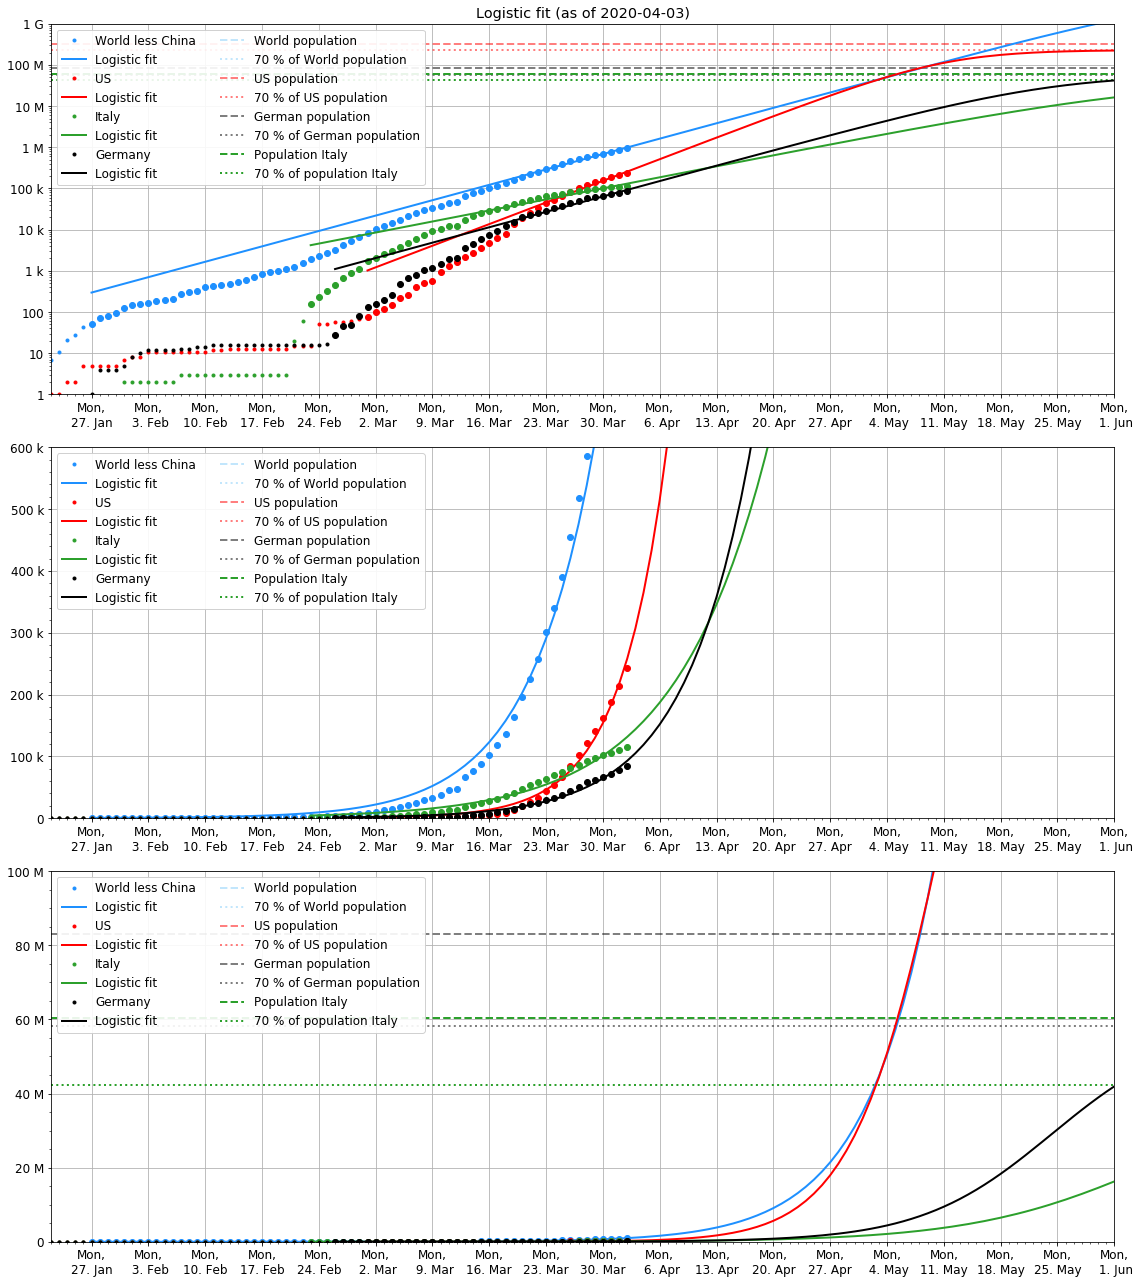

In [6]:
# fit curves
# - exponential
# - logistic
# - numeric: rate of change: good, as-is, max rate observed

from matplotlib.ticker import (EngFormatter, FuncFormatter, FormatStrFormatter, AutoMinorLocator, NullFormatter)
from scipy.stats import expon, logistic
from scipy import optimize

xmin = "2020-01-22"
xmax = "2020-06-01"

def exp_func(x, a, b):
    return a * np.exp(b * x)
                      
def logistic_func(x, a, b, x0):
    return a / (1 + np.exp(-b * (x - x0)))

def logistic_func_de(x, b, x0):
    return population_de * 0.7 / (1 + np.exp(-b * (x - x0)))
def logistic_func_us(x, b, x0):
    return population_us * 0.7 / (1 + np.exp(-b * (x - x0)))
def logistic_func_it(x, b, x0):
    return population_it * 0.7 / (1 + np.exp(-b * (x - x0)))
def logistic_func_world(x, b, x0):
    return population_world * 0.7 / (1 + np.exp(-b * (x - x0)))
logistic_func_fixed =[logistic_func_world, logistic_func_us, logistic_func_it, logistic_func_de]


ymax = 1e9

# set prediction xrange
pred_duration = 190
x_pred_duration = np.arange(pred_duration)
x_pred_duration_dates = pd.date_range('2020-01-22', periods=pred_duration, freq='1d')
pred_range_de = slice(pred_duration, None)

# fit exponential function to all regions
regions = ["World less China", "US", "Italy", "Germany"]
regions_lc = [lc4, lc2, lc3, lc10]
regions_fit_ranges = [slice(5, None), slice(39, None), slice(32, None), slice(35, None)]
logistic_params = []
for i, region in enumerate(regions):
    x_data = data_df["#"][regions_fit_ranges[i]]
    y_data = data_df[region][regions_fit_ranges[i]]
    logistic_params.append(optimize.curve_fit(logistic_func_fixed[i], x_data, y_data, p0=[0.01, 0.01])[0])
print(logistic_params)

##########################
plt.rc('legend', fancybox=True, framealpha=0.9)

# define subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(16, 18))

# set subplot
ax = axes[0]
for i, region in enumerate(regions):
    ax.plot(data_df[region], 'o', ms=3, label=region, **regions_lc[i])
    ax.plot(data_df[region][regions_fit_ranges[i]], 'o', label=region, **regions_lc[i])
    ax.plot(x_pred_duration_dates[regions_fit_ranges[i]], logistic_func_fixed[i](x_pred_duration[regions_fit_ranges[i]], logistic_params[i][0], logistic_params[i][1]), '-', label='Logistic fit', **regions_lc[i], alpha=1)

ax.hlines(y=population_world, xmin=xmin, xmax=xmax, linestyles='--', alpha=0.5, **lc7, label="World population")
ax.hlines(y=population_world * 0.7, xmin=xmin, xmax=xmax, linestyles=':', alpha=0.5, **lc7, label="70 % of World population")
ax.hlines(y=population_us, xmin=xmin, xmax=xmax, linestyles='--', alpha=0.5, **lc2, label="US population")
ax.hlines(y=population_us * 0.7, xmin=xmin, xmax=xmax, linestyles=':', alpha=0.5, **lc2, label="70 % of US population")
ax.hlines(y=population_de, xmin=xmin, xmax=xmax, linestyles='--', alpha=0.5, **lc10, label="German population")
ax.hlines(y=population_de * 0.7, xmin=xmin, xmax=xmax, linestyles=':', alpha=0.5, **lc10, label="70 % of German population")
ax.hlines(y=population_it, xmin=xmin, xmax=xmax, linestyles='--', **lc3, label="Population Italy")
ax.hlines(y=population_it * 0.7, xmin=xmin, xmax=xmax, linestyles=':', **lc3, label="70 % of population Italy")

# settings
ax.set_xlim(xmin, xmax)
ax.set_ylim(1, ymax)

#ax.set_xlabel("x")
#ax.set_ylabel("y")
#ax.set_title("My")
ax.set_title("Logistic fit (as of "+today+")")

#ax.set_xscale('log')
ax.set_yscale('log')


# set subplot
ax = axes[1]
for i, region in enumerate(regions):
    ax.plot(data_df[region], 'o', ms=3, label=region, **regions_lc[i])
    ax.plot(data_df[region][regions_fit_ranges[i]], 'o', label=region, **regions_lc[i])
    ax.plot(x_pred_duration_dates[regions_fit_ranges[i]], logistic_func_fixed[i](x_pred_duration[regions_fit_ranges[i]], logistic_params[i][0], logistic_params[i][1]), '-', label='Logistic fit', **regions_lc[i], alpha=1)

ax.hlines(y=population_world, xmin=xmin, xmax=xmax, linestyles='--', alpha=0.5, **lc7, label="World population")
ax.hlines(y=population_world * 0.7, xmin=xmin, xmax=xmax, linestyles=':', alpha=0.5, **lc7, label="70 % of World population")
ax.hlines(y=population_us, xmin=xmin, xmax=xmax, linestyles='--', alpha=0.5, **lc2, label="US population")
ax.hlines(y=population_us * 0.7, xmin=xmin, xmax=xmax, linestyles=':', alpha=0.5, **lc2, label="70 % of US population")
ax.hlines(y=population_de, xmin=xmin, xmax=xmax, linestyles='--', alpha=0.5, **lc10, label="German population")
ax.hlines(y=population_de * 0.7, xmin=xmin, xmax=xmax, linestyles=':', alpha=0.5, **lc10, label="70 % of German population")
ax.hlines(y=population_it, xmin=xmin, xmax=xmax, linestyles='--', **lc3, label="Population Italy")
ax.hlines(y=population_it * 0.7, xmin=xmin, xmax=xmax, linestyles=':', **lc3, label="70 % of population Italy")

# settings
ax.set_xlim(xmin, xmax)
ax.set_ylim(1, 6e5)

#ax.set_xlabel("x")
#ax.set_ylabel("y")
#ax.set_title("My")

#ax.set_xscale('log')
#ax.set_yscale('log')


# set subplot
ax = axes[2]
for i, region in enumerate(regions):
    ax.plot(data_df[region], 'o', ms=3, label=region, **regions_lc[i])
    ax.plot(data_df[region][regions_fit_ranges[i]], 'o', label=region, **regions_lc[i])
    ax.plot(x_pred_duration_dates[regions_fit_ranges[i]], logistic_func_fixed[i](x_pred_duration[regions_fit_ranges[i]], logistic_params[i][0], logistic_params[i][1]), '-', label='Logistic fit', **regions_lc[i], alpha=1)

ax.hlines(y=population_world, xmin=xmin, xmax=xmax, linestyles='--', alpha=0.5, **lc7, label="World population")
ax.hlines(y=population_world * 0.7, xmin=xmin, xmax=xmax, linestyles=':', alpha=0.5, **lc7, label="70 % of World population")
ax.hlines(y=population_us, xmin=xmin, xmax=xmax, linestyles='--', alpha=0.5, **lc2, label="US population")
ax.hlines(y=population_us * 0.7, xmin=xmin, xmax=xmax, linestyles=':', alpha=0.5, **lc2, label="70 % of US population")
ax.hlines(y=population_de, xmin=xmin, xmax=xmax, linestyles='--', alpha=0.5, **lc10, label="German population")
ax.hlines(y=population_de * 0.7, xmin=xmin, xmax=xmax, linestyles=':', alpha=0.5, **lc10, label="70 % of German population")
ax.hlines(y=population_it, xmin=xmin, xmax=xmax, linestyles='--', **lc3, label="Population Italy")
ax.hlines(y=population_it * 0.7, xmin=xmin, xmax=xmax, linestyles=':', **lc3, label="70 % of population Italy")

# settings
ax.set_xlim(xmin, xmax)
ax.set_ylim(1, 1e8)

#ax.set_xlabel("x")
#ax.set_ylabel("y")
#ax.set_title("My")

#ax.set_xscale('log')
#ax.set_yscale('log')

# general settings
for ax in axes:
    ax.minorticks_on()
    ax.xaxis.set_major_locator(weeks)
    ax.xaxis.set_minor_locator(days)
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%a,\n%e. %b"))
    ax.yaxis.set_major_formatter(EngFormatter(unit=''))
    ax.legend(loc='upper left', ncol=2) # fontsize='small'
    ax.grid(True)


# show and save
plt.tight_layout()
plt.show()
fig.savefig("plots/plot_covid19_timeseries_logistic_fit_old.png")


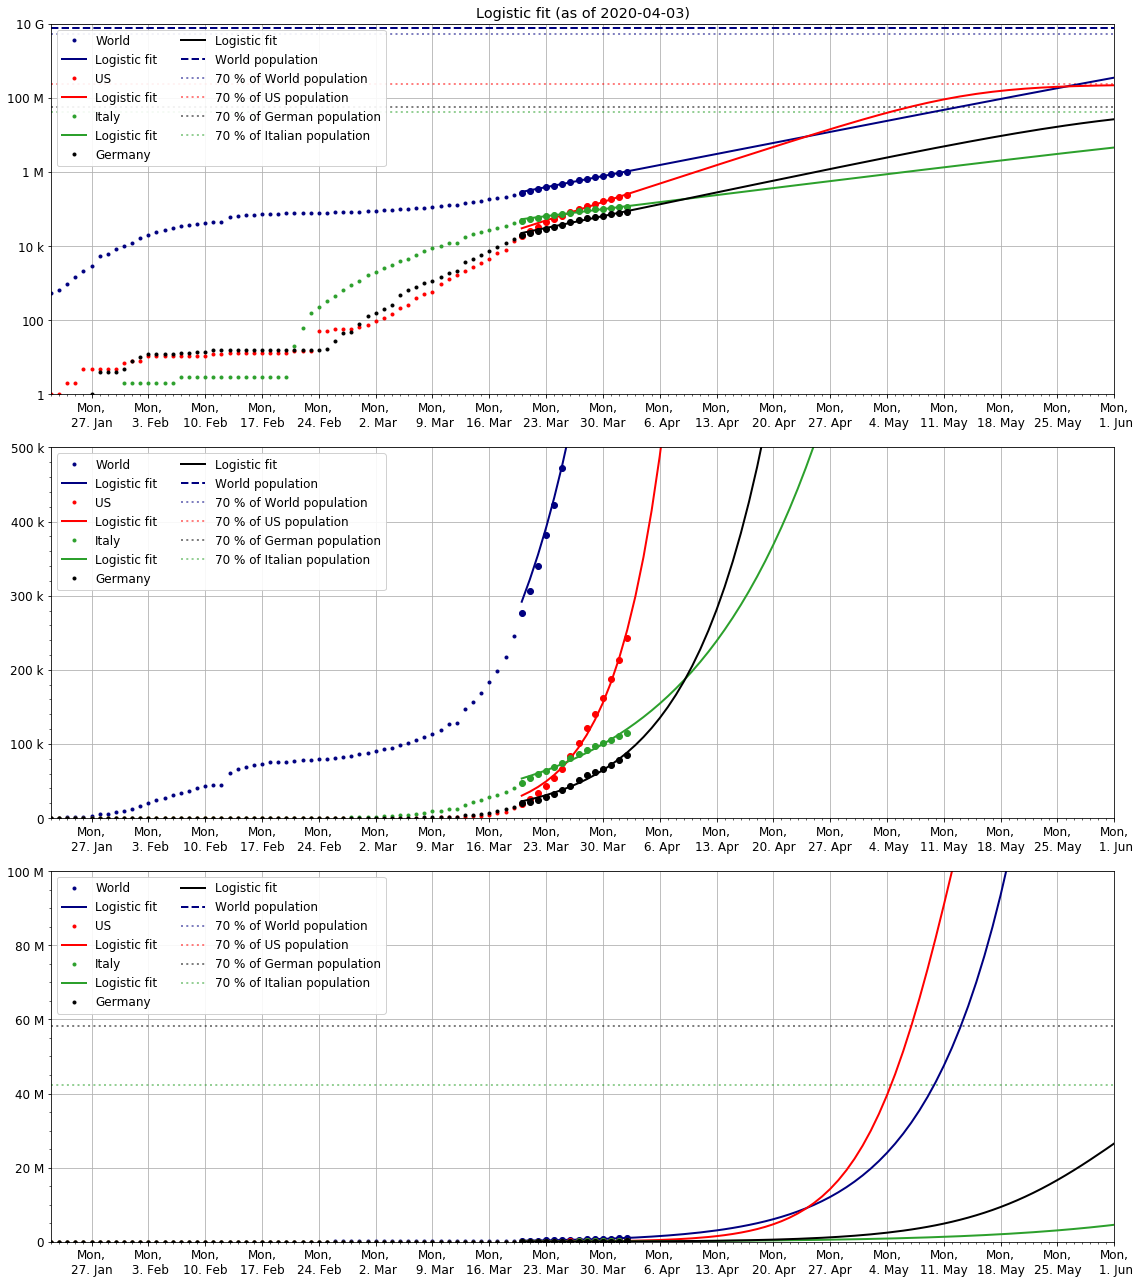

In [25]:
# predictions for Germany
# both exp and logistic fits
# logistic with 100% and 70% population ceiling
# try with lower spreading rate

from scipy.stats import expon, logistic
from scipy import optimize
from matplotlib.ticker import EngFormatter

xmin = "2020-01-22"
xmax = "2020-06-01"

def exp_func(x, a, b):
    return a * np.exp(b * x)
                      
def logistic_func(x, a, b, x0):
    return a / (1 + np.exp(-b * (x - x0)))

def logistic_func_de(x, b, x0):
    return population_de * 0.7 / (1 + np.exp(-b * (x - x0)))
def logistic_func_us(x, b, x0):
    return population_us * 0.7 / (1 + np.exp(-b * (x - x0)))
def logistic_func_it(x, b, x0):
    return population_it * 0.7 / (1 + np.exp(-b * (x - x0)))
def logistic_func_world(x, b, x0):
    return population_world * 0.7 / (1 + np.exp(-b * (x - x0)))
logistic_func_fixed =[logistic_func_world, logistic_func_us, logistic_func_it, logistic_func_de]

def linear_func(x, a, x0):
    return a * (x - x0)

# set prediction xrange
pred_duration = 190
x_pred_duration = np.arange(pred_duration)
x_pred_duration_dates = pd.date_range('2020-01-22', periods=pred_duration, freq='1d')
pred_range_de = slice(pred_duration, None)

# fit exponential function to all regions
regions = ["World", "US", "Italy", "Germany"]
regions_lc = [lc8, lc2, lc3, lc10]
regions_fit_ranges = [slice(-14, None), slice(-14, None), slice(-14, None), slice(-14, None)]
regions_x_pred_plot_ranges = [slice(data_df["#"][item][0], None) for item in regions_fit_ranges]
exp_params = []
logistic_params = []
linear_params = []
calculations_df = pd.DataFrame(index=x_pred_duration_dates)
for i, region in enumerate(regions):
    x_data = data_df["#"][regions_fit_ranges[i]]
    y_data = data_df[region][regions_fit_ranges[i]]
    exp_params.append(optimize.curve_fit(exp_func, x_data, y_data, p0=[1, 0.05])[0])
    logistic_params.append(optimize.curve_fit(logistic_func_fixed[i], x_data, y_data, p0=[0.01, 0.01])[0])
    linear_params.append(optimize.curve_fit(linear_func, x_data, y_data, p0=[1.1, 0.1])[0])
    calculations_df[region+" exponential fit"] = exp_func(x_pred_duration, exp_params[i][0], exp_params[i][1])
    calculations_df[region+" logistic fit"] = logistic_func_fixed[i](x_pred_duration, logistic_params[i][0], logistic_params[i][1])
    calculations_df[region+" linear fit"] = linear_func(x_pred_duration, exp_params[i][0], exp_params[i][1])
    calculations_df.insert(0, region+" exponential fit daily cases", calculations_df[region+" exponential fit"].diff(periods=1))
    calculations_df.insert(0, region+" logistic fit daily cases", calculations_df[region+" logistic fit"].diff(periods=1))
    calculations_df.insert(0, region+" linear fit daily cases", calculations_df[region+" linear fit"].diff(periods=1))
#print(calculations_df)

ymax = 1e10

##########################
# define subplots
plt.rc('legend', fancybox=True, framealpha=0.9)

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(16, 18))

# set subplot
ax = axes[0]
for i, region in enumerate(regions):
    ax.plot(data_df[region], 'o', ms=3, label=region, **regions_lc[i])
    ax.plot(data_df[region][regions_fit_ranges[i]], 'o', label=region, **regions_lc[i])
    ax.plot(x_pred_duration_dates[regions_x_pred_plot_ranges[i]], logistic_func_fixed[i](x_pred_duration[regions_x_pred_plot_ranges[i]], logistic_params[i][0], logistic_params[i][1]), '-', label='Logistic fit', **regions_lc[i], alpha=1)
#    ax.plot(x_pred_duration_dates[regions_x_pred_plot_ranges[i]], linear_func(x_pred_duration[regions_x_pred_plot_ranges[i]], linear_params[i][0], linear_params[i][1]), '-', label='Linear fit', **regions_lc[i], alpha=0.5)

ax.hlines(y=population_world, xmin=xmin, xmax=xmax, linestyles='--', alpha=1, **lc8, label="World population")
ax.hlines(y=population_world * 0.7, xmin=xmin, xmax=xmax, linestyles=':', alpha=0.5, **lc8, label="70 % of World population")
#ax.hlines(y=population_us, xmin=xmin, xmax=xmax, linestyles='--', alpha=0.5, **lc2, label="US population")
ax.hlines(y=population_us * 0.7, xmin=xmin, xmax=xmax, linestyles=':', alpha=0.5, **lc2, label="70 % of US population")
#ax.hlines(y=population_de, xmin=xmin, xmax=xmax, linestyles='--', alpha=0.5, **lc10, label="German population")
ax.hlines(y=population_de * 0.7, xmin=xmin, xmax=xmax, linestyles=':', alpha=0.5, **lc10, label="70 % of German population")
ax.hlines(y=population_it * 0.7, xmin=xmin, xmax=xmax, linestyles=':', alpha=0.5, **lc3, label="70 % of Italian population")

# settings
ax.set_xlim(xmin, xmax)
ax.set_ylim(1, ymax)

#ax.set_xlabel("x")
#ax.set_ylabel("y")
#ax.set_title("My")
#ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title("Logistic fit (as of "+today+")")


# set subplot
ax = axes[1]
for i, region in enumerate(regions):
    ax.plot(data_df[region], 'o', ms=3, label=region, **regions_lc[i])
    ax.plot(data_df[region][regions_fit_ranges[i]], 'o', label=region, **regions_lc[i])
    ax.plot(x_pred_duration_dates[regions_x_pred_plot_ranges[i]], logistic_func_fixed[i](x_pred_duration[regions_x_pred_plot_ranges[i]], logistic_params[i][0], logistic_params[i][1]), '-', label='Logistic fit', **regions_lc[i], alpha=1)
#    ax.plot(x_pred_duration_dates[regions_x_pred_plot_ranges[i]], linear_func(x_pred_duration[regions_x_pred_plot_ranges[i]], linear_params[i][0], linear_params[i][1]), '-', label='Linear fit', **regions_lc[i], alpha=0.5)

ax.hlines(y=population_world, xmin=xmin, xmax=xmax, linestyles='--', alpha=1, **lc8, label="World population")
ax.hlines(y=population_world * 0.7, xmin=xmin, xmax=xmax, linestyles=':', alpha=0.5, **lc8, label="70 % of World population")
#ax.hlines(y=population_us, xmin=xmin, xmax=xmax, linestyles='--', alpha=0.5, **lc2, label="US population")
ax.hlines(y=population_us * 0.7, xmin=xmin, xmax=xmax, linestyles=':', alpha=0.5, **lc2, label="70 % of US population")
#ax.hlines(y=population_de, xmin=xmin, xmax=xmax, linestyles='--', alpha=0.5, **lc10, label="German population")
ax.hlines(y=population_de * 0.7, xmin=xmin, xmax=xmax, linestyles=':', alpha=0.5, **lc10, label="70 % of German population")
ax.hlines(y=population_it * 0.7, xmin=xmin, xmax=xmax, linestyles=':', alpha=0.5, **lc3, label="70 % of Italian population")

# settings
ax.set_xlim(xmin, xmax)
ax.set_ylim(1, 5e5)

#ax.set_xlabel("x")
#ax.set_ylabel("y")
#ax.set_title("My")
#ax.set_xscale('log')
#ax.set_yscale('log')


# set subplot
ax = axes[2]
for i, region in enumerate(regions):
    ax.plot(data_df[region], 'o', ms=3, label=region, **regions_lc[i])
    ax.plot(data_df[region][regions_fit_ranges[i]], 'o', label=region, **regions_lc[i])
    ax.plot(x_pred_duration_dates[regions_x_pred_plot_ranges[i]], logistic_func_fixed[i](x_pred_duration[regions_x_pred_plot_ranges[i]], logistic_params[i][0], logistic_params[i][1]), '-', label='Logistic fit', **regions_lc[i], alpha=1)
#    ax.plot(x_pred_duration_dates[regions_x_pred_plot_ranges[i]], linear_func(x_pred_duration[regions_x_pred_plot_ranges[i]], linear_params[i][0], linear_params[i][1]), '-', label='Linear fit', **regions_lc[i], alpha=0.5)

ax.hlines(y=population_world, xmin=xmin, xmax=xmax, linestyles='--', alpha=1, **lc8, label="World population")
ax.hlines(y=population_world * 0.7, xmin=xmin, xmax=xmax, linestyles=':', alpha=0.5, **lc8, label="70 % of World population")
#ax.hlines(y=population_us, xmin=xmin, xmax=xmax, linestyles='--', alpha=0.5, **lc2, label="US population")
ax.hlines(y=population_us * 0.7, xmin=xmin, xmax=xmax, linestyles=':', alpha=0.5, **lc2, label="70 % of US population")
#ax.hlines(y=population_de, xmin=xmin, xmax=xmax, linestyles='--', alpha=0.5, **lc10, label="German population")
ax.hlines(y=population_de * 0.7, xmin=xmin, xmax=xmax, linestyles=':', alpha=0.5, **lc10, label="70 % of German population")
ax.hlines(y=population_it * 0.7, xmin=xmin, xmax=xmax, linestyles=':', alpha=0.5, **lc3, label="70 % of Italian population")

# settings
ax.set_xlim(xmin, xmax)
ax.set_ylim(1, 1e8)

#ax.set_xlabel("x")
#ax.set_ylabel("y")
#ax.set_title("My")
#ax.set_xscale('log')
#ax.set_yscale('log')

# general settings
for ax in axes:
    ax.minorticks_on()
    ax.xaxis.set_major_locator(weeks)
    ax.xaxis.set_minor_locator(days)
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%a,\n%e. %b"))
    ax.yaxis.set_major_formatter(EngFormatter(unit=''))
    ax.legend(loc='upper left', ncol=2) # fontsize='small'
    ax.grid(True)


# show and save
plt.tight_layout()
plt.show()
fig.savefig("plots/plot_covid19_timeseries_logistic_fit.png")


c:\python36\lib\site-packages\matplotlib\scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


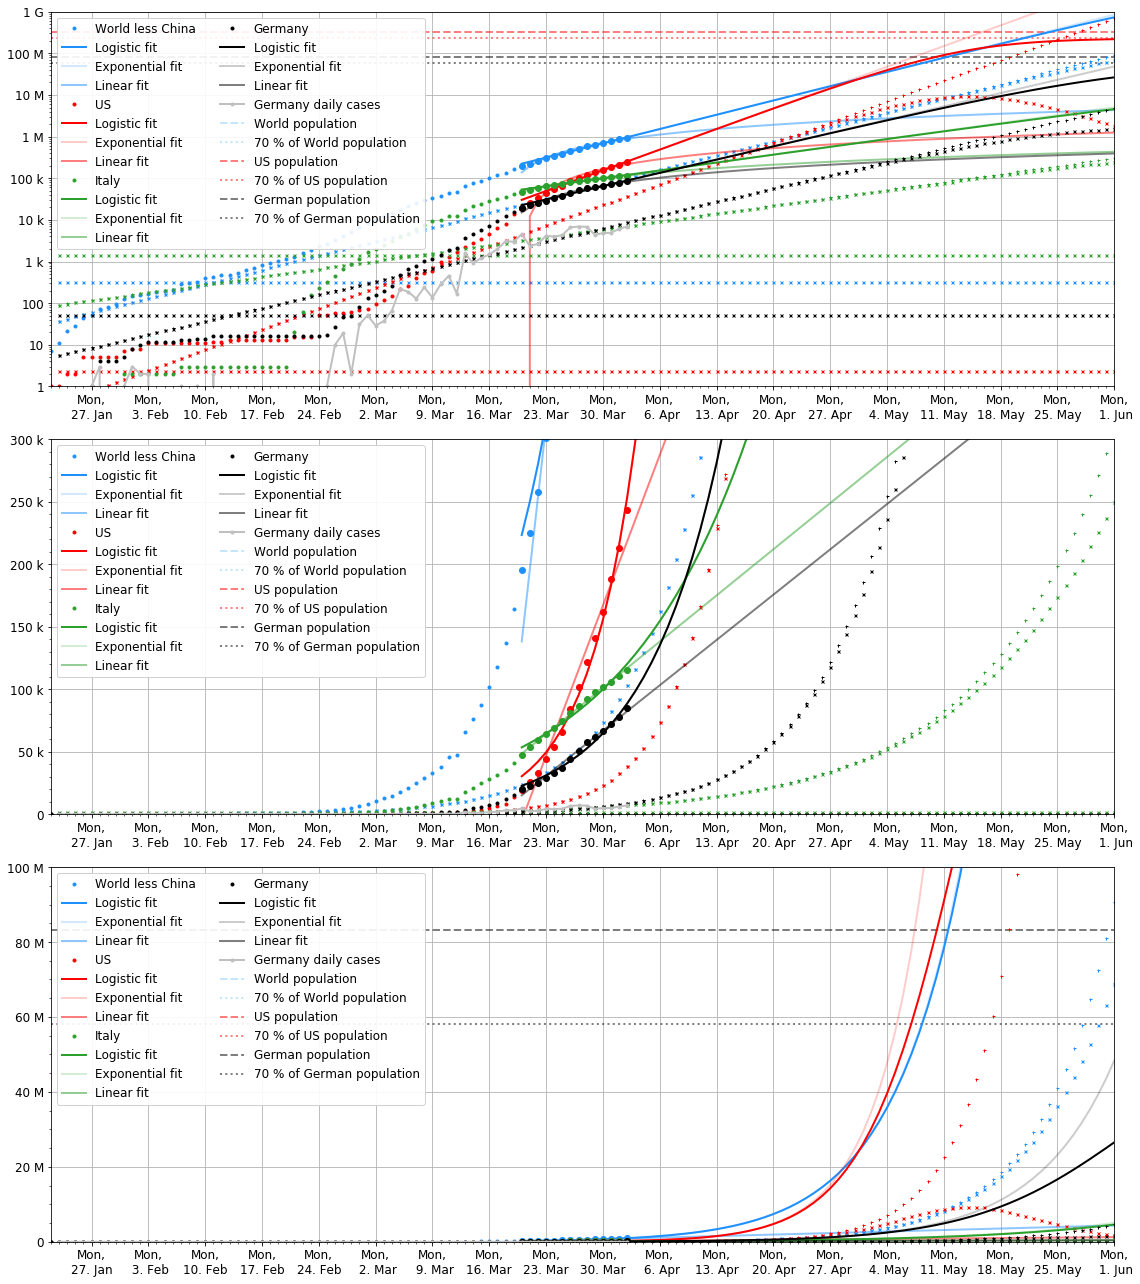

In [8]:
# predictions for Germany
# both exp and logistic fits
# logistic with 100% and 70% population ceiling
# try with lower spreading rate

from scipy.stats import expon, logistic
from scipy import optimize
from matplotlib.ticker import EngFormatter

xmin = "2020-01-22"
xmax = "2020-06-01"

def exp_func(x, a, b):
    return a * np.exp(b * x)
                      
def logistic_func(x, a, b, x0):
    return a / (1 + np.exp(-b * (x - x0)))

def logistic_func_de(x, b, x0):
    return population_de * 0.7 / (1 + np.exp(-b * (x - x0)))
def logistic_func_us(x, b, x0):
    return population_us * 0.7 / (1 + np.exp(-b * (x - x0)))
def logistic_func_it(x, b, x0):
    return population_it * 0.7 / (1 + np.exp(-b * (x - x0)))
def logistic_func_world(x, b, x0):
    return population_world * 0.7 / (1 + np.exp(-b * (x - x0)))
logistic_func_fixed =[logistic_func_world, logistic_func_us, logistic_func_it, logistic_func_de]

def linear_func(x, a, x0):
    return a * (x - x0)

# set prediction xrange
pred_duration = 190
x_pred_duration = np.arange(pred_duration)
x_pred_duration_dates = pd.date_range('2020-01-22', periods=pred_duration, freq='1d')
pred_range_de = slice(pred_duration, None)

# fit exponential function to all regions
regions = ["World less China", "US", "Italy", "Germany"]
regions_lc = [lc4, lc2, lc3, lc10]
regions_fit_ranges = [slice(-14, None), slice(-14, None), slice(-14, None), slice(-14, None)]
regions_x_pred_plot_ranges = [slice(data_df["#"][item][0], None) for item in regions_fit_ranges]
exp_params = []
logistic_params = []
linear_params = []
calculations_df = pd.DataFrame(index=x_pred_duration_dates)
for i, region in enumerate(regions):
    x_data = data_df["#"][regions_fit_ranges[i]]
    y_data = data_df[region][regions_fit_ranges[i]]
    exp_params.append(optimize.curve_fit(exp_func, x_data, y_data, p0=[1, 0.05])[0])
    logistic_params.append(optimize.curve_fit(logistic_func_fixed[i], x_data, y_data, p0=[0.01, 0.01])[0])
    linear_params.append(optimize.curve_fit(linear_func, x_data, y_data, p0=[1.1, 0.1])[0])
    calculations_df[region+" exponential fit"] = exp_func(x_pred_duration, exp_params[i][0], exp_params[i][1])
    calculations_df[region+" logistic fit"] = logistic_func_fixed[i](x_pred_duration, logistic_params[i][0], logistic_params[i][1])
    calculations_df[region+" linear fit"] = linear_func(x_pred_duration, exp_params[i][0], exp_params[i][1])
    calculations_df.insert(0, region+" exponential fit daily cases", calculations_df[region+" exponential fit"].diff(periods=1))
    calculations_df.insert(0, region+" logistic fit daily cases", calculations_df[region+" logistic fit"].diff(periods=1))
    calculations_df.insert(0, region+" linear fit daily cases", calculations_df[region+" linear fit"].diff(periods=1))
#print(calculations_df)

ymax = 1e9

##########################
# define subplots
plt.rc('legend', fancybox=True, framealpha=0.9)

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(16, 18))

# set subplot
ax = axes[0]
for i, region in enumerate(regions):
    ax.plot(data_df[region], 'o', ms=3, label=region, **regions_lc[i])
    ax.plot(data_df[region][regions_fit_ranges[i]], 'o', label=region, **regions_lc[i])
    ax.plot(x_pred_duration_dates[regions_x_pred_plot_ranges[i]], logistic_func_fixed[i](x_pred_duration[regions_x_pred_plot_ranges[i]], logistic_params[i][0], logistic_params[i][1]), '-', label='Logistic fit', **regions_lc[i], alpha=1)
    ax.plot(x_pred_duration_dates[regions_x_pred_plot_ranges[i]], exp_func(x_pred_duration[regions_x_pred_plot_ranges[i]], exp_params[i][0], exp_params[i][1]), '-', label='Exponential fit', **regions_lc[i], alpha=0.2)
    ax.plot(x_pred_duration_dates[regions_x_pred_plot_ranges[i]], linear_func(x_pred_duration[regions_x_pred_plot_ranges[i]], linear_params[i][0], linear_params[i][1]), '-', label='Linear fit', **regions_lc[i], alpha=0.5)
    ax.plot(calculations_df[region+" exponential fit daily cases"], '+', ms=3, label=region, **regions_lc[i])
    ax.plot(calculations_df[region+" logistic fit daily cases"], 'x', ms=3, label=region, **regions_lc[i])
    ax.plot(calculations_df[region+" linear fit daily cases"], 'x', ms=3, label=region, **regions_lc[i])
ax.plot(data_df["Germany daily cases"], 'o-', ms=3, label="Germany daily cases", **lc11)

ax.hlines(y=population_world, xmin=xmin, xmax=xmax, linestyles='--', alpha=0.5, **lc7, label="World population")
ax.hlines(y=population_world * 0.7, xmin=xmin, xmax=xmax, linestyles=':', alpha=0.5, **lc7, label="70 % of World population")
ax.hlines(y=population_us, xmin=xmin, xmax=xmax, linestyles='--', alpha=0.5, **lc2, label="US population")
ax.hlines(y=population_us * 0.7, xmin=xmin, xmax=xmax, linestyles=':', alpha=0.5, **lc2, label="70 % of US population")
ax.hlines(y=population_de, xmin=xmin, xmax=xmax, linestyles='--', alpha=0.5, **lc10, label="German population")
ax.hlines(y=population_de * 0.7, xmin=xmin, xmax=xmax, linestyles=':', alpha=0.5, **lc10, label="70 % of German population")

# settings
ax.set_xlim(xmin, xmax)
ax.set_ylim(1, ymax)

#ax.set_xlabel("x")
#ax.set_ylabel("y")
#ax.set_title("My")
#ax.set_xscale('log')
ax.set_yscale('log')


# set subplot
ax = axes[1]
for i, region in enumerate(regions):
    ax.plot(data_df[region], 'o', ms=3, label=region, **regions_lc[i])
    ax.plot(data_df[region][regions_fit_ranges[i]], 'o', label=region, **regions_lc[i])
    ax.plot(x_pred_duration_dates[regions_x_pred_plot_ranges[i]], logistic_func_fixed[i](x_pred_duration[regions_x_pred_plot_ranges[i]], logistic_params[i][0], logistic_params[i][1]), '-', label='Logistic fit', **regions_lc[i], alpha=1)
    ax.plot(x_pred_duration_dates[regions_x_pred_plot_ranges[i]], exp_func(x_pred_duration[regions_x_pred_plot_ranges[i]], exp_params[i][0], exp_params[i][1]), '-', label='Exponential fit', **regions_lc[i], alpha=0.2)
    ax.plot(x_pred_duration_dates[regions_x_pred_plot_ranges[i]], linear_func(x_pred_duration[regions_x_pred_plot_ranges[i]], linear_params[i][0], linear_params[i][1]), '-', label='Linear fit', **regions_lc[i], alpha=0.5)
    ax.plot(calculations_df[region+" exponential fit daily cases"], '+', ms=3, label=region, **regions_lc[i])
    ax.plot(calculations_df[region+" logistic fit daily cases"], 'x', ms=3, label=region, **regions_lc[i])
    ax.plot(calculations_df[region+" linear fit daily cases"], 'x', ms=3, label=region, **regions_lc[i])
ax.plot(data_df["Germany daily cases"], 'o-', ms=3, label="Germany daily cases", **lc11)

ax.hlines(y=population_world, xmin=xmin, xmax=xmax, linestyles='--', alpha=0.5, **lc7, label="World population")
ax.hlines(y=population_world * 0.7, xmin=xmin, xmax=xmax, linestyles=':', alpha=0.5, **lc7, label="70 % of World population")
ax.hlines(y=population_us, xmin=xmin, xmax=xmax, linestyles='--', alpha=0.5, **lc2, label="US population")
ax.hlines(y=population_us * 0.7, xmin=xmin, xmax=xmax, linestyles=':', alpha=0.5, **lc2, label="70 % of US population")
ax.hlines(y=population_de, xmin=xmin, xmax=xmax, linestyles='--', alpha=0.5, **lc10, label="German population")
ax.hlines(y=population_de * 0.7, xmin=xmin, xmax=xmax, linestyles=':', alpha=0.5, **lc10, label="70 % of German population")

# settings
ax.set_xlim(xmin, xmax)
ax.set_ylim(1, 3e5)

#ax.set_xlabel("x")
#ax.set_ylabel("y")
#ax.set_title("My")
#ax.set_xscale('log')
#ax.set_yscale('log')


# set subplot
ax = axes[2]
for i, region in enumerate(regions):
    ax.plot(data_df[region], 'o', ms=3, label=region, **regions_lc[i])
    ax.plot(data_df[region][regions_fit_ranges[i]], 'o', label=region, **regions_lc[i])
    ax.plot(x_pred_duration_dates[regions_x_pred_plot_ranges[i]], logistic_func_fixed[i](x_pred_duration[regions_x_pred_plot_ranges[i]], logistic_params[i][0], logistic_params[i][1]), '-', label='Logistic fit', **regions_lc[i], alpha=1)
    ax.plot(x_pred_duration_dates[regions_x_pred_plot_ranges[i]], exp_func(x_pred_duration[regions_x_pred_plot_ranges[i]], exp_params[i][0], exp_params[i][1]), '-', label='Exponential fit', **regions_lc[i], alpha=0.2)
    ax.plot(x_pred_duration_dates[regions_x_pred_plot_ranges[i]], linear_func(x_pred_duration[regions_x_pred_plot_ranges[i]], linear_params[i][0], linear_params[i][1]), '-', label='Linear fit', **regions_lc[i], alpha=0.5)
    ax.plot(calculations_df[region+" exponential fit daily cases"], '+', ms=3, label=region, **regions_lc[i])
    ax.plot(calculations_df[region+" logistic fit daily cases"], 'x', ms=3, label=region, **regions_lc[i])
    ax.plot(calculations_df[region+" linear fit daily cases"], 'x', ms=3, label=region, **regions_lc[i])
ax.plot(data_df["Germany daily cases"], 'o-', ms=3, label="Germany daily cases", **lc11)

ax.hlines(y=population_world, xmin=xmin, xmax=xmax, linestyles='--', alpha=0.5, **lc7, label="World population")
ax.hlines(y=population_world * 0.7, xmin=xmin, xmax=xmax, linestyles=':', alpha=0.5, **lc7, label="70 % of World population")
ax.hlines(y=population_us, xmin=xmin, xmax=xmax, linestyles='--', alpha=0.5, **lc2, label="US population")
ax.hlines(y=population_us * 0.7, xmin=xmin, xmax=xmax, linestyles=':', alpha=0.5, **lc2, label="70 % of US population")
ax.hlines(y=population_de, xmin=xmin, xmax=xmax, linestyles='--', alpha=0.5, **lc10, label="German population")
ax.hlines(y=population_de * 0.7, xmin=xmin, xmax=xmax, linestyles=':', alpha=0.5, **lc10, label="70 % of German population")

# settings
ax.set_xlim(xmin, xmax)
ax.set_ylim(1, 1e8)

#ax.set_xlabel("x")
#ax.set_ylabel("y")
#ax.set_title("My")
#ax.set_xscale('log')
#ax.set_yscale('log')

# general settings
for ax in axes:
    ax.minorticks_on()
    ax.xaxis.set_major_locator(weeks)
    ax.xaxis.set_minor_locator(days)
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%a,\n%e. %b"))
    ax.yaxis.set_major_formatter(EngFormatter(unit=''))
    ax.legend(loc='upper left', ncol=2) # fontsize='small'
    ax.grid(True)


# show and save
plt.tight_layout()
plt.show()
fig.savefig("plots/plot_covid19_timeseries_predictions_test.png")


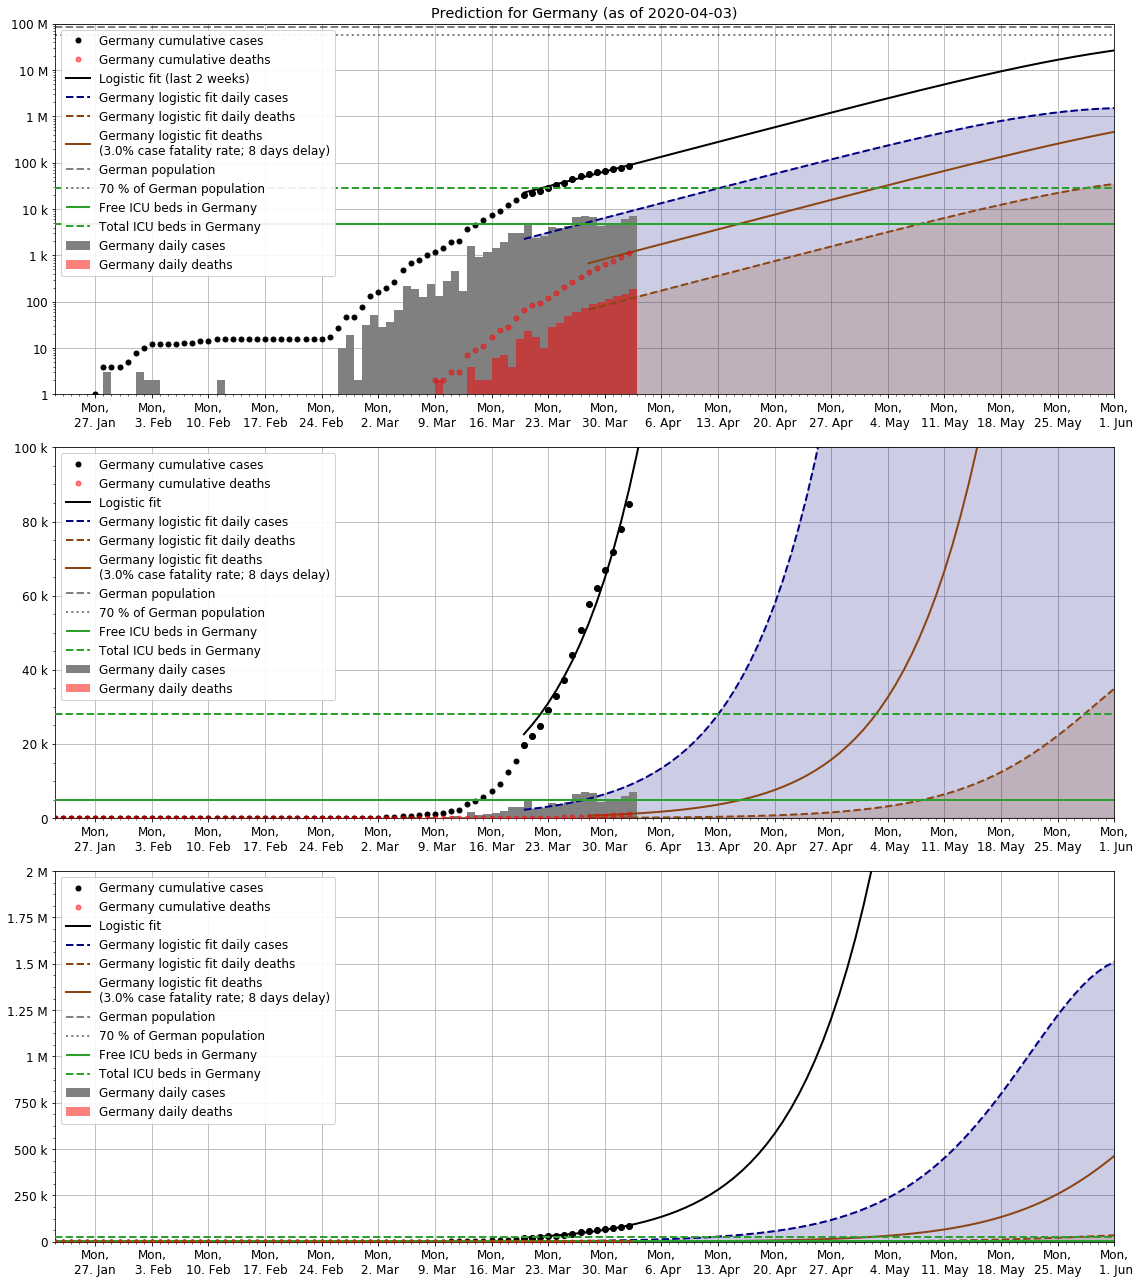

In [18]:
# predictions for Germany
# both exp and logistic fits
# logistic with 100% and 70% population ceiling
# try with lower spreading rate

from scipy.stats import expon, logistic
from scipy import optimize
from matplotlib.ticker import EngFormatter

xmin = "2020-01-22"
xmax = "2020-06-01"
free_icu_units = 4800 # DIVI https://www.divi.de/aktuelle-meldungen-intensivmedizin/covid-19-erste-daten-fuer-die-anzahl-von-patienten-sowie-verfuegbaren-intensivbetten
total_icu_units = 28000 # Statistisches Bundesamt https://www.destatis.de/DE/Presse/Pressemitteilungen/2020/03/PD20_N011_231.html

def exp_func(x, a, b):
    return a * np.exp(b * x)
                      
def logistic_func(x, a, b, x0):
    return a / (1 + np.exp(-b * (x - x0)))

def logistic_func_de(x, b, x0):
    return population_de * 0.7 / (1 + np.exp(-b * (x - x0)))
def logistic_func_us(x, b, x0):
    return population_us * 0.7 / (1 + np.exp(-b * (x - x0)))
def logistic_func_world(x, b, x0):
    return population_world * 0.7 / (1 + np.exp(-b * (x - x0)))
logistic_func_fixed =[logistic_func_de]

def linear_func(x, a, x0):
    return a * (x - x0)


# set prediction xrange
pred_duration = 190
x_pred_duration = np.arange(pred_duration)
x_pred_duration_dates = pd.date_range('2020-01-22', periods=pred_duration, freq='1d')
pred_range_de = slice(pred_duration, None)

# fit exponential and logistic functions to all regions
regions = ["Germany"]
regions_lc = [lc10]
regions_fit_ranges = [slice(-14, None)]
regions_x_pred_plot_ranges = [slice(data_df["#"][item][0], None) for item in regions_fit_ranges]
exp_params = []
logistic_params = []
linear_params = []
calculations_df = pd.DataFrame(index=x_pred_duration_dates)
for i, region in enumerate(regions):
    x_data = data_df["#"][regions_fit_ranges[i]]
    y_data = data_df[region][regions_fit_ranges[i]]
    exp_params.append(optimize.curve_fit(exp_func, x_data, y_data, p0=[1, 0.05])[0])
    logistic_params.append(optimize.curve_fit(logistic_func_fixed[i], x_data, y_data, p0=[0.01, 0.01])[0])
    linear_params.append(optimize.curve_fit(linear_func, x_data, y_data, p0=[1.1, 0.1])[0])
    calculations_df[region+" exponential fit"] = exp_func(x_pred_duration, exp_params[i][0], exp_params[i][1])
    calculations_df[region+" logistic fit"] = logistic_func_fixed[i](x_pred_duration, logistic_params[i][0], logistic_params[i][1])
    calculations_df[region+" linear fit"] = linear_func(x_pred_duration, exp_params[i][0], exp_params[i][1])
    calculations_df.insert(0, region+" exponential fit daily cases", calculations_df[region+" exponential fit"].diff(periods=1))
    calculations_df.insert(0, region+" logistic fit daily cases", calculations_df[region+" logistic fit"].diff(periods=1))
    calculations_df.insert(0, region+" linear fit daily cases", calculations_df[region+" linear fit"].diff(periods=1))
#print(calculations_df)

# estimate death curve
    death_rate = 0.03
    death_delay = 8
    calculations_df.insert(0, region+" logistic fit deaths", calculations_df[region+" logistic fit"].shift(death_delay) * death_rate)
    calculations_df.insert(0, region+" logistic fit daily deaths", calculations_df[region+" logistic fit daily cases"].shift(death_delay) * death_rate)
    
ymax = 1e9

##########################
plt.rc('legend', fancybox=True, framealpha=0.9)

# define subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(16, 18))

# set subplot
ax = axes[0]
for i, region in enumerate(regions):
    ax.plot(data_df[region], 'o', ms=5, label=region+" cumulative cases", **regions_lc[i])
    ax.plot(data_deaths_df[region], 'o', ms=5, label=region+" cumulative deaths", **lc2, alpha=0.5, zorder=20)
    ax.plot(data_df[region][regions_fit_ranges[i]], 'o', label=region+" cumulative cases", **regions_lc[i])
#    ax.plot(x_pred_duration_dates[regions_fit_ranges[i]], exp_func(x_pred_duration[regions_fit_ranges[i]], exp_params[i][0], exp_params[i][1]), '-', label='Exponential fit', **lc10, alpha=0.5)
#    ax.plot(calculations_df[region+" exponential fit daily cases"], '+', ms=3, label=region+" exponential fit daily cases", **regions_lc[i])
    ax.plot(x_pred_duration_dates[regions_x_pred_plot_ranges[i]], logistic_func_fixed[i](x_pred_duration[regions_x_pred_plot_ranges[i]], logistic_params[i][0], logistic_params[i][1]), '-', label='Logistic fit (last 2 weeks)', **lc10, alpha=1)
    ax.fill_between(calculations_df.index[regions_x_pred_plot_ranges[i]], calculations_df[region+" logistic fit daily cases"][regions_x_pred_plot_ranges[i]], **lc8, alpha=0.2)
    ax.plot(calculations_df[region+" logistic fit daily cases"][regions_x_pred_plot_ranges[i]], '--', label=region+" logistic fit daily cases", **lc8, alpha=1)
    ax.fill_between(calculations_df.index[regions_x_pred_plot_ranges[i]], calculations_df[region+" logistic fit daily deaths"][regions_x_pred_plot_ranges[i]], **lc6, alpha=0.2)
    ax.plot(calculations_df[region+" logistic fit daily deaths"][regions_x_pred_plot_ranges[i]][death_delay:], '--', label=region+" logistic fit daily deaths", **lc6, alpha=1)
    ax.plot(calculations_df[region+" logistic fit deaths"][regions_x_pred_plot_ranges[i]][death_delay:], '-', label=region+" logistic fit deaths\n({:.1f}% case fatality rate; {:d} days delay)".format(death_rate*100, death_delay), **lc6, alpha=1)
    ax.bar(data_df.index, data_df[region+" daily cases"], width=1, align='edge', **lc12, label=region+" daily cases", alpha=1)
    ax.bar(data_deaths_df.index, data_deaths_df[region+" daily cases"], width=1, align='edge', **lc2, label=region+" daily deaths", alpha=0.5)

ax.hlines(y=population_de, xmin=xmin, xmax=xmax, linestyles='--', alpha=0.5, **lc10, label="German population")
ax.hlines(y=population_de * 0.7, xmin=xmin, xmax=xmax, linestyles=':', alpha=0.5, **lc10, label="70 % of German population")
ax.hlines(y=free_icu_units, xmin=xmin, xmax=xmax, linestyles='-', alpha=1, **lc3, label="Free ICU beds in Germany", zorder=20)
ax.hlines(y=total_icu_units, xmin=xmin, xmax=xmax, linestyles='--', alpha=1, **lc3, label="Total ICU beds in Germany", zorder=20)

# settings
ax.set_xlim(xmin, xmax)
ax.set_ylim(1, 1e8)
#ax.set_xlabel("x")
#ax.set_ylabel("y")
#ax.set_title("My")

ax.set_title("Prediction for Germany (as of "+today+")")
#ax.set_xscale('log')
ax.set_yscale('log')

# set subplot
ax = axes[1]
for i, region in enumerate(regions):
    ax.plot(data_df[region], 'o', ms=5, label=region+" cumulative cases", **regions_lc[i])
    ax.plot(data_deaths_df[region], 'o', ms=5, label=region+" cumulative deaths", **lc2, alpha=0.5, zorder=20)
    ax.plot(data_df[region][regions_fit_ranges[i]], 'o', label=region+" cumulative cases", **regions_lc[i])
#    ax.plot(x_pred_duration_dates[regions_fit_ranges[i]], exp_func(x_pred_duration[regions_fit_ranges[i]], exp_params[i][0], exp_params[i][1]), '-', label='Exponential fit', **lc10, alpha=0.5)
#    ax.plot(calculations_df[region+" exponential fit daily cases"], '+', ms=3, label=region+" exponential fit daily cases", **regions_lc[i])
    ax.plot(x_pred_duration_dates[regions_x_pred_plot_ranges[i]], logistic_func_fixed[i](x_pred_duration[regions_x_pred_plot_ranges[i]], logistic_params[i][0], logistic_params[i][1]), '-', label='Logistic fit', **lc10, alpha=1)
    ax.fill_between(calculations_df.index[regions_x_pred_plot_ranges[i]], calculations_df[region+" logistic fit daily cases"][regions_x_pred_plot_ranges[i]], **lc8, alpha=0.2)
    ax.plot(calculations_df[region+" logistic fit daily cases"][regions_x_pred_plot_ranges[i]], '--', label=region+" logistic fit daily cases", **lc8, alpha=1)
    ax.fill_between(calculations_df.index[regions_x_pred_plot_ranges[i]], calculations_df[region+" logistic fit daily deaths"][regions_x_pred_plot_ranges[i]], **lc6, alpha=0.2)
    ax.plot(calculations_df[region+" logistic fit daily deaths"][regions_x_pred_plot_ranges[i]][death_delay:], '--', label=region+" logistic fit daily deaths", **lc6, alpha=1)
    ax.plot(calculations_df[region+" logistic fit deaths"][regions_x_pred_plot_ranges[i]][death_delay:], '-', label=region+" logistic fit deaths\n({:.1f}% case fatality rate; {:d} days delay)".format(death_rate*100, death_delay), **lc6, alpha=1)
    ax.bar(data_df.index, data_df[region+" daily cases"], width=1, align='edge', **lc12, label=region+" daily cases", alpha=1)
    ax.bar(data_deaths_df.index, data_deaths_df[region+" daily cases"], width=1, align='edge', **lc2, label=region+" daily deaths", alpha=0.5)

ax.hlines(y=population_de, xmin=xmin, xmax=xmax, linestyles='--', alpha=0.5, **lc10, label="German population")
ax.hlines(y=population_de * 0.7, xmin=xmin, xmax=xmax, linestyles=':', alpha=0.5, **lc10, label="70 % of German population")
ax.hlines(y=free_icu_units, xmin=xmin, xmax=xmax, linestyles='-', alpha=1, **lc3, label="Free ICU beds in Germany", zorder=20)
ax.hlines(y=total_icu_units, xmin=xmin, xmax=xmax, linestyles='--', alpha=1, **lc3, label="Total ICU beds in Germany", zorder=20)

# settings
ax.set_xlim(xmin, xmax)
ax.set_ylim(1, 1e5)

#ax.set_xlabel("x")
#ax.set_ylabel("y")
#ax.set_title("My")
#ax.set_xscale('log')
#ax.set_yscale('log')


# set subplot
ax = axes[2]
for i, region in enumerate(regions):
    ax.plot(data_df[region], 'o', ms=5, label=region+" cumulative cases", **regions_lc[i])
    ax.plot(data_deaths_df[region], 'o', ms=5, label=region+" cumulative deaths", **lc2, alpha=0.5, zorder=20)
    ax.plot(data_df[region][regions_fit_ranges[i]], 'o', label=region+" cumulative cases", **regions_lc[i])
#    ax.plot(x_pred_duration_dates[regions_fit_ranges[i]], exp_func(x_pred_duration[regions_fit_ranges[i]], exp_params[i][0], exp_params[i][1]), '-', label='Exponential fit', **lc10, alpha=0.5)
#    ax.plot(calculations_df[region+" exponential fit daily cases"], '+', ms=3, label=region+" exponential fit daily cases", **regions_lc[i])
    ax.plot(x_pred_duration_dates[regions_x_pred_plot_ranges[i]], logistic_func_fixed[i](x_pred_duration[regions_x_pred_plot_ranges[i]], logistic_params[i][0], logistic_params[i][1]), '-', label='Logistic fit', **lc10, alpha=1)
    ax.fill_between(calculations_df.index[regions_x_pred_plot_ranges[i]], calculations_df[region+" logistic fit daily cases"][regions_x_pred_plot_ranges[i]], **lc8, alpha=0.2)
    ax.plot(calculations_df[region+" logistic fit daily cases"][regions_x_pred_plot_ranges[i]], '--', label=region+" logistic fit daily cases", **lc8, alpha=1)
    ax.fill_between(calculations_df.index[regions_x_pred_plot_ranges[i]], calculations_df[region+" logistic fit daily deaths"][regions_x_pred_plot_ranges[i]], **lc6, alpha=0.2)
    ax.plot(calculations_df[region+" logistic fit daily deaths"][regions_x_pred_plot_ranges[i]][death_delay:], '--', label=region+" logistic fit daily deaths", **lc6, alpha=1)
    ax.plot(calculations_df[region+" logistic fit deaths"][regions_x_pred_plot_ranges[i]][death_delay:], '-', label=region+" logistic fit deaths\n({:.1f}% case fatality rate; {:d} days delay)".format(death_rate*100, death_delay), **lc6, alpha=1)
    ax.bar(data_df.index, data_df[region+" daily cases"], width=1, align='edge', **lc12, label=region+" daily cases", alpha=1)
    ax.bar(data_deaths_df.index, data_deaths_df[region+" daily cases"], width=1, align='edge', **lc2, label=region+" daily deaths", alpha=0.5)

ax.hlines(y=population_de, xmin=xmin, xmax=xmax, linestyles='--', alpha=0.5, **lc10, label="German population")
ax.hlines(y=population_de * 0.7, xmin=xmin, xmax=xmax, linestyles=':', alpha=0.5, **lc10, label="70 % of German population")
ax.hlines(y=free_icu_units, xmin=xmin, xmax=xmax, linestyles='-', alpha=1, **lc3, label="Free ICU beds in Germany", zorder=20)
ax.hlines(y=total_icu_units, xmin=xmin, xmax=xmax, linestyles='--', alpha=1, **lc3, label="Total ICU beds in Germany", zorder=20)

# settings
ax.set_xlim(xmin, xmax)
ax.set_ylim(1, 2e6)

#ax.set_xlabel("x")
#ax.set_ylabel("y")
#ax.set_title("My")
#ax.set_xscale('log')
#ax.set_yscale('log')

# general settings
for ax in axes:
    ax.minorticks_on()
    ax.xaxis.set_major_locator(weeks)
    ax.xaxis.set_minor_locator(days)
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%a,\n%e. %b"))
    ax.yaxis.set_major_formatter(EngFormatter(unit=''))
    ax.grid(True)
    ax.legend(loc='upper left').set_zorder(30) # fontsize='small'


# show and save
plt.tight_layout()
plt.show()
fig.savefig("plots/plot_covid19_timeseries_predictions_de.png")


2020-03-05


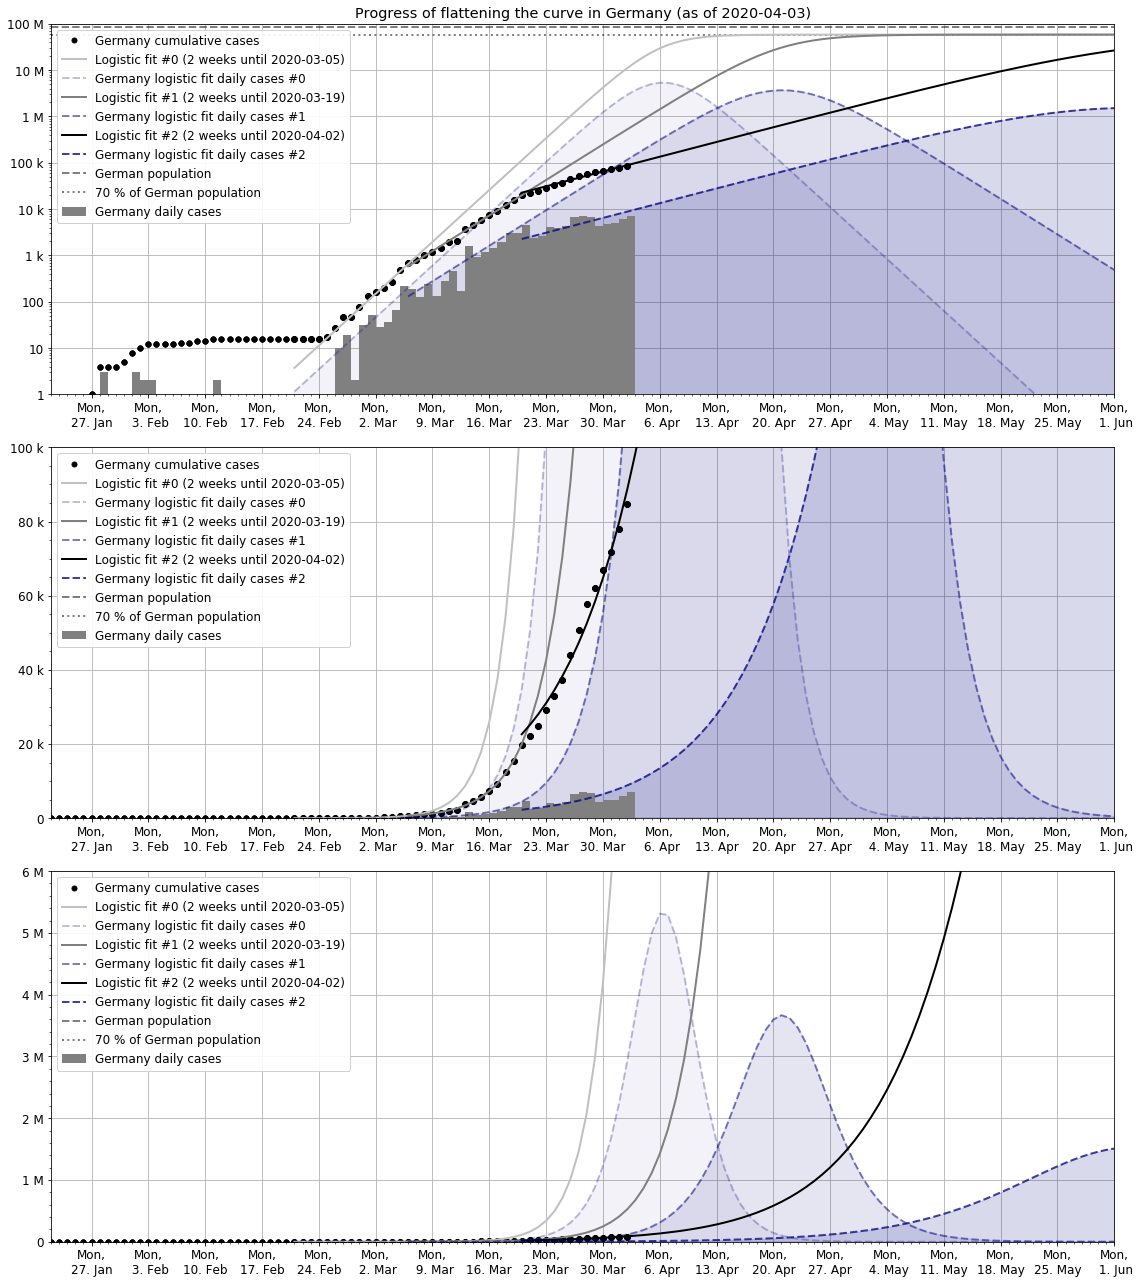

In [20]:
# predictions for Germany
# both exp and logistic fits
# logistic with 100% and 70% population ceiling
# try with lower spreading rate

from scipy.stats import expon, logistic
from scipy import optimize
from matplotlib.ticker import EngFormatter

xmin = "2020-01-22"
xmax = "2020-06-01"

def exp_func(x, a, b):
    return a * np.exp(b * x)
                      
def logistic_func(x, a, b, x0):
    return a / (1 + np.exp(-b * (x - x0)))

def logistic_func_de(x, b, x0):
    return population_de * 0.7 / (1 + np.exp(-b * (x - x0)))
def logistic_func_us(x, b, x0):
    return population_us * 0.7 / (1 + np.exp(-b * (x - x0)))
def logistic_func_world(x, b, x0):
    return population_world * 0.7 / (1 + np.exp(-b * (x - x0)))
logistic_func_fixed =[logistic_func_de, logistic_func_de, logistic_func_de, logistic_func_de]

def linear_func(x, a, x0):
    return a * (x - x0)

# set prediction xrange
pred_duration = 190
x_pred_duration = np.arange(pred_duration)
x_pred_duration_dates = pd.date_range('2020-01-22', periods=pred_duration, freq='1d')
pred_range_de = slice(pred_duration, None)

# fit exponential and logistic functions to all regions
regions = ["Germany", "Germany", "Germany"]
regions_lc = [lc11, lc12, lc10, lc10]
regions_fit_ranges = [slice(30, 44), slice(44, 58), slice(58, 72), slice(-14, None)]
regions_x_pred_plot_ranges = [slice(data_df["#"][item][0], None) for item in regions_fit_ranges]
exp_params = []
logistic_params = []
linear_params = []
calculations_df = pd.DataFrame(index=x_pred_duration_dates)
for i, region in enumerate(regions):
    x_data = data_df["#"][regions_fit_ranges[i]]
    y_data = data_df[region][regions_fit_ranges[i]]
    exp_params.append(optimize.curve_fit(exp_func, x_data, y_data, p0=[1, 0.05])[0])
    logistic_params.append(optimize.curve_fit(logistic_func_fixed[i], x_data, y_data, p0=[0.01, 0.01])[0])
    linear_params.append(optimize.curve_fit(linear_func, x_data, y_data, p0=[1.1, 0.1])[0])
    calculations_df[region+" exponential fit "+str(i)] = exp_func(x_pred_duration, exp_params[i][0], exp_params[i][1])
    calculations_df[region+" logistic fit "+str(i)] = logistic_func_fixed[i](x_pred_duration, logistic_params[i][0], logistic_params[i][1])
    calculations_df[region+" linear fit "+str(i)] = linear_func(x_pred_duration, exp_params[i][0], exp_params[i][1])
    calculations_df.insert(0, region+" exponential fit daily cases "+str(i), calculations_df[region+" exponential fit "+str(i)].diff(periods=1))
    calculations_df.insert(0, region+" logistic fit daily cases "+str(i), calculations_df[region+" logistic fit "+str(i)].diff(periods=1))
    calculations_df.insert(0, region+" linear fit daily cases "+str(i), calculations_df[region+" linear fit "+str(i)].diff(periods=1))
#print(calculations_df)

# estimate death curve
    death_rate = 0.03
    death_delay = 8
    calculations_df.insert(0, region+" logistic fit deaths "+str(i), calculations_df[region+" logistic fit "+str(i)].shift(death_delay) * death_rate)
    calculations_df.insert(0, region+" logistic fit daily deaths "+str(i), calculations_df[region+" logistic fit daily cases "+str(i)].shift(death_delay) * death_rate)

print(data_df.index[regions_fit_ranges[0]][-1].date())
    
ymax = 1e9

##########################
plt.rc('legend', fancybox=True, framealpha=0.9)

# define subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(16, 18))

# set subplot
ax = axes[0]
for i, region in enumerate(regions):
    ax.plot(data_df[region], 'o', ms=5, label=region+" cumulative cases", **lc10, zorder=1)
    ax.plot(data_df[region][regions_fit_ranges[i]], 'o', label=region+" cumulative cases", **lc10, zorder=1)
    ax.plot(x_pred_duration_dates[regions_x_pred_plot_ranges[i]], logistic_func_fixed[i](x_pred_duration[regions_x_pred_plot_ranges[i]], logistic_params[i][0], logistic_params[i][1]), '-', label="Logistic fit #{} (2 weeks until {})".format(i, data_df.index[regions_fit_ranges[i]][-1].date()), **regions_lc[i], alpha=1)
    ax.fill_between(calculations_df.index[regions_x_pred_plot_ranges[i]], calculations_df[region+" logistic fit daily cases "+str(i)][regions_x_pred_plot_ranges[i]], **lc8, alpha=0.05+i*0.05)
    ax.plot(calculations_df[region+" logistic fit daily cases "+str(i)][regions_x_pred_plot_ranges[i]], '--', label=region+" logistic fit daily cases #"+str(i), **lc8, alpha=0.25+i*0.25)
    ax.bar(data_df.index, data_df[region+" daily cases"], width=1, align='edge', **lc12, label=region+" daily cases", alpha=1)
#    ax.plot(calculations_df[region+" logistic fit deaths "+str(i)][regions_fit_ranges[2]], '-', label=region+" logistic fit deaths\n(2.3% case fatality rate; 10 days delay)", **lc6, alpha=0.33+i*0.33)

ax.hlines(y=population_de, xmin=xmin, xmax=xmax, linestyles='--', alpha=0.5, **lc10, label="German population")
ax.hlines(y=population_de * 0.7, xmin=xmin, xmax=xmax, linestyles=':', alpha=0.5, **lc10, label="70 % of German population")

# settings
ax.set_xlim(xmin, xmax)
ax.set_ylim(1, 1e8)
#ax.set_xlabel("x")
#ax.set_ylabel("y")
#ax.set_title("My")
ax.set_title("Progress of flattening the curve in Germany (as of "+today+")")
#ax.set_xscale('log')
ax.set_yscale('log')

# set subplot
ax = axes[1]
for i, region in enumerate(regions):
    ax.plot(data_df[region], 'o', ms=5, label=region+" cumulative cases", **lc10, zorder=1)
    ax.plot(data_df[region][regions_fit_ranges[i]], 'o', label=region+" cumulative cases", **lc10, zorder=1)
    ax.plot(x_pred_duration_dates[regions_x_pred_plot_ranges[i]], logistic_func_fixed[i](x_pred_duration[regions_x_pred_plot_ranges[i]], logistic_params[i][0], logistic_params[i][1]), '-', label="Logistic fit #{} (2 weeks until {})".format(i, data_df.index[regions_fit_ranges[i]][-1].date()), **regions_lc[i], alpha=1)
    ax.fill_between(calculations_df.index[regions_x_pred_plot_ranges[i]], calculations_df[region+" logistic fit daily cases "+str(i)][regions_x_pred_plot_ranges[i]], **lc8, alpha=0.05+i*0.05)
    ax.plot(calculations_df[region+" logistic fit daily cases "+str(i)][regions_x_pred_plot_ranges[i]], '--', label=region+" logistic fit daily cases #"+str(i), **lc8, alpha=0.25+i*0.25)
    ax.bar(data_df.index, data_df[region+" daily cases"], width=1, align='edge', **lc12, label=region+" daily cases", alpha=1)

ax.hlines(y=population_de, xmin=xmin, xmax=xmax, linestyles='--', alpha=0.5, **lc10, label="German population")
ax.hlines(y=population_de * 0.7, xmin=xmin, xmax=xmax, linestyles=':', alpha=0.5, **lc10, label="70 % of German population")

# settings
ax.set_xlim(xmin, xmax)
ax.set_ylim(1, 1e5)
#ax.set_xlabel("x")
#ax.set_ylabel("y")
#ax.set_title("My")
#ax.set_xscale('log')
#ax.set_yscale('log')


# set subplot
ax = axes[2]
for i, region in enumerate(regions):
    ax.plot(data_df[region], 'o', ms=5, label=region+" cumulative cases", **lc10, zorder=1)
    ax.plot(data_df[region][regions_fit_ranges[i]], 'o', label=region+" cumulative cases", **lc10, zorder=1)
    ax.plot(x_pred_duration_dates[regions_x_pred_plot_ranges[i]], logistic_func_fixed[i](x_pred_duration[regions_x_pred_plot_ranges[i]], logistic_params[i][0], logistic_params[i][1]), '-', label="Logistic fit #{} (2 weeks until {})".format(i, data_df.index[regions_fit_ranges[i]][-1].date()), **regions_lc[i], alpha=1)
    ax.fill_between(calculations_df.index[regions_x_pred_plot_ranges[i]], calculations_df[region+" logistic fit daily cases "+str(i)][regions_x_pred_plot_ranges[i]], **lc8, alpha=0.05+i*0.05)
    ax.plot(calculations_df[region+" logistic fit daily cases "+str(i)][regions_x_pred_plot_ranges[i]], '--', label=region+" logistic fit daily cases #"+str(i), **lc8, alpha=0.25+i*0.25)
    ax.bar(data_df.index, data_df[region+" daily cases"], width=1, align='edge', **lc12, label=region+" daily cases", alpha=1)

ax.hlines(y=population_de, xmin=xmin, xmax=xmax, linestyles='--', alpha=0.5, **lc10, label="German population")
ax.hlines(y=population_de * 0.7, xmin=xmin, xmax=xmax, linestyles=':', alpha=0.5, **lc10, label="70 % of German population")

# settings
ax.set_xlim(xmin, xmax)
ax.set_ylim(1, 6e6)
#ax.set_xlabel("x")
#ax.set_ylabel("y")
#ax.set_title("My")
#ax.set_xscale('log')
#ax.set_yscale('log')

# general settings
for ax in axes:
    ax.minorticks_on()
    ax.xaxis.set_major_locator(weeks)
    ax.xaxis.set_minor_locator(days)
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%a,\n%e. %b"))
    ax.yaxis.set_major_formatter(EngFormatter(unit=''))
    ax.grid(True)
    ax.legend(loc='upper left') # fontsize='small'


# show and save
plt.tight_layout()
plt.show()
fig.savefig("plots/plot_covid19_timeseries_change_de.png")
